# Import the needed libaries

In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Model selection and evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, brier_score_loss, confusion_matrix, 
                             ConfusionMatrixDisplay, f1_score, precision_score, 
                             recall_score, roc_auc_score, roc_curve)

# Calibration
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Over-sampling techniques
from imblearn.over_sampling import  SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.base import BaseEstimator, TransformerMixin


# Visualization
import matplotlib.pyplot as plt
import pickle

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load Dataset

In [ ]:
df = pd.read_csv("Knowledge_base_train.csv")
df.head()

class  num_clients  Sum of Instances in Clients  \
0    XGBRegressor           10                        13821   
1    XGBRegressor            5                         4031   
2  HUBERREGRESSOR            5                        17280   
3       LinearSVR            5                         6911   
4    XGBRegressor           15                        24181   

   Max. Of Instances in Clients  Min. Of Instances in Clients  \
0                          1383                          1382   
1                           807                           806   
2                          3456                          3456   
3                          1383                          1382   
4                          1613                          1612   

   Stddev of Instances in Clients  Average Dataset Missing Values %  \
0                        0.300000                          4.992466   
1                        0.400000                          4.762946   
2                        0.000000                          5.104167   
3                        0.400000                          4.934113   
4                        0.249444                          4.966717   

   Min Dataset Missing Values %  Max Dataset Missing Values %  \
0                      4.121475                      5.571635   
1                      3.970223                      6.203474   
2                      4.745370                      5.295139   
3                      4.052098                      5.571635   
4                      3.535980                      6.389578   

   Stddev Dataset Missing Values %  ...  \
0                         0.448970  ...   
1                         0.875041  ...   
2                         0.188945  ...   
3                         0.524086  ...   
4                         0.693981  ...   

   Min No. Of Insignificant Lags in Target  \
0                                        0   
1                                        0   
2                                        2   
3                                        1   
4                                        0   

   Stddev No. Of Insignificant Lags in Target  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Avg. No. Of Seasonality Components in Target  \
0                                             2   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

   Max No. Of Seasonality Components in Target  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            1   

   Min No. Of Seasonality Components in Target  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            1   

   Stddev No. Of Seasonality Components in Target  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Average Fractal Dimensionality Across Clients of Target  \
0                                           0.009829         
1                                           0.033774         
2                                           0.017802         
3                                           0.390252         
4                                           0.014879   

# Data splitting:
It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen dat

In [ ]:
# Split data into features (X) and target (y)

X = df.drop('class', axis=1)
y = df['class']

# Split data into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into train and validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Training Set: (256, 57), Validation Set: (64, 57), Test Set: (80, 57)


In [ ]:
# Combine features and labels for each dataset
train_combined = pd.concat([X_train, y_train], axis=1)
test_combined = pd.concat([X_test, y_test], axis=1)
val_combined = pd.concat([X_val, y_val], axis=1)

# EDA on training data


## check NaNs and duplicates
result : there is no Nans and duplicates

In [ ]:
# Check for NaN values in each column
nan_counts_train = train_combined.isna().sum()
nan_counts_test = test_combined.isna().sum()
nan_counts_validation = val_combined.isna().sum()
print(f"the count of NaNs in training dataset features {nan_counts_train} ")
print(f"the count of NaNs in testing dataset features{nan_counts_test} ")
print(f"the count of NaNs in validation dataset features{nan_counts_validation}")

the count of NaNs in training dataset features num_clients                                                          0
Sum of Instances in Clients                                          0
Max. Of Instances in Clients                                         0
Min. Of Instances in Clients                                         0
Stddev of Instances in Clients                                       0
Average Dataset Missing Values %                                     0
Min Dataset Missing Values %                                         0
Max Dataset Missing Values %                                         0
Stddev Dataset Missing Values %                                      0
Average Target Missing Values %                                      0
Min Target Missing Values %                                          0
Max Target Missing Values %                                          0
Stddev Target Missing Values %                                       0
No. Of Features               

In [ ]:

# Check for duplicates in each combined dataset
duplicates_train_combined = train_combined.duplicated().sum()
duplicates_test_combined = test_combined.duplicated().sum()
duplicates_val_combined = val_combined.duplicated().sum()

# Print the count of duplicated rows in each dataset
print(f"The count of duplicated rows in training dataset : {duplicates_train_combined}")
print(f"The count of duplicated rows in testing dataset : {duplicates_test_combined}")
print(f"The count of duplicated rows in validation dataset : {duplicates_val_combined}")


The count of duplicated rows in training dataset : 0
The count of duplicated rows in testing dataset : 0
The count of duplicated rows in validation dataset : 0


## check dataset balancing
resutlt : The Dataset is not balanced

In [ ]:
# Check class distribution for training, testing, and validation datasets
train_class_distribution = train_combined['class'].value_counts()
test_class_distribution = test_combined['class'].value_counts()
val_class_distribution = val_combined['class'].value_counts()

# Print class distributions
print("Class distribution in training dataset:")
print(train_class_distribution)

print("\nClass distribution in testing dataset:")
print(test_class_distribution)

print("\nClass distribution in validation dataset:")
print(val_class_distribution)


Class distribution in training dataset:
class
XGBRegressor         118
HUBERREGRESSOR        51
LinearSVR             42
LASSO                 30
QUANTILEREGRESSOR     12
ELASTICNETCV           3
Name: count, dtype: int64

Class distribution in testing dataset:
class
XGBRegressor         32
LinearSVR            18
HUBERREGRESSOR       17
LASSO                 8
QUANTILEREGRESSOR     3
ELASTICNETCV          2
Name: count, dtype: int64

Class distribution in validation dataset:
class
XGBRegressor         27
HUBERREGRESSOR       17
LinearSVR             9
LASSO                 8
QUANTILEREGRESSOR     2
ELASTICNETCV          1
Name: count, dtype: int64


# Create a pipline for TargetEncoder

In [ ]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoder_file='target_encoder.pkl'):
        self.encoder = LabelEncoder()
        self.encoder_file = encoder_file

    def fit(self, y):
        # Fit the LabelEncoder and save it to a pickle file
        self.encoder.fit(y.values.ravel())
        with open(self.encoder_file, 'wb') as f:
            pickle.dump(self.encoder, f)
        return self

    def transform(self, y):
        # Load the fitted encoder from the pickle file
        with open(self.encoder_file, 'rb') as f:
            self.encoder = pickle.load(f)
        return pd.Series(self.encoder.transform(y.values.ravel()), index=y.index)

    def fit_transform(self, y):
        return self.fit(y).transform(y)


In [ ]:
encoder = TargetEncoder(encoder_file='class_encoder.pkl')

y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

y_val = encoder.transform(y_val)


In [ ]:
print("Encoded y_train:")
print(y_train[:2])
print("\nEncoded y_test:")
print(y_test[:2])


Encoded y_train:
179    5
270    3
dtype: int64

Encoded y_test:
209    2
280    3
dtype: int64


# Data prepossing

In [ ]:
scaler = StandardScaler()

# Apply StandardScaler to X_train
X_train = scaler.fit_transform(X_train)
# Store the fitted scaler in a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# Load the fitted scaler from the pickle file
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Use the loaded scaler to transform new data
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)



In [ ]:
sampling_strategy = {0: 150, 1: 150, 2: 150, 3: 150, 4: 150, 5: 150} 
smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=2, random_state=42)

# Apply SMOTE to X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the resampled class distribution
from collections import Counter
print("Resampled class distribution:", Counter(y_train_resampled))

Resampled class distribution: Counter({5: 150, 3: 150, 1: 150, 0: 150, 4: 150, 2: 150})


In [ ]:
unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))
print(class_counts_dict)

{0: 150, 1: 150, 2: 150, 3: 150, 4: 150, 5: 150}


In [ ]:

# Convert X_train_resampled to DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=[f'feature_{i}' for i in range(X_train_resampled.shape[1])])

# Convert y_train_resampled to DataFrame (if it is a 1D array, it will be reshaped)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['target'])

# Combine the features and target into one DataFrame
train_resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Check the result
train_resampled_df.head(5)


feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.044084   1.171849   0.637074   0.637475  -1.376809   0.332821   
1  -0.044084   1.794275   1.061905   1.061747   0.448995   0.220031   
2   0.896381   1.794691   0.267261   0.267088   0.141309   0.167885   
3  -0.984549   1.459391   2.989809   2.989686   1.057596   0.161061   
4   0.896381  -0.265862  -0.669750  -0.669372  -1.376809   0.160489   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0   0.667889   0.065726  -0.795656   0.332810  ...         0.0   -0.340941   
1   0.666169  -0.111185  -1.157172   0.220029  ...         0.0   -0.340941   
2   0.197830   0.192814   0.040322   0.167887  ...         0.0   -0.340941   
3   0.601090  -0.041009  -0.719046   0.161063  ...         0.0   -0.340941   
4   0.266250   0.193498   0.032575   0.160492  ...         0.0   -0.340941   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0   -0.340941   -0.340941         0.0   -0.571503   -0.247506   -0.196753   
1   -0.340941   -0.340941         0.0   -0.752841   -0.247506   -0.196753   
2   -0.340941   -0.340941         0.0   -0.468100   -0.247506   -0.196753   
3   -0.340941   -0.340941         0.0   -0.705459   -0.247506   -0.196753   
4   -0.340941   -0.340941         0.0   -0.751791   -0.247506   -0.196753   

   feature_56  target  
0    1.590646       5  
1    0.962421       3  
2   -0.858832       1  
3   -0.858832       3  
4    0.032610       5  

[5 rows x 58 columns]

# Helper functions

In [ ]:
def evaluate_model_performance(clf, X_test, y_test):
    test_preds = clf.predict(X_test)
    test_pred_prob = clf.predict_proba(X_test)

    accuracy = accuracy_score(y_test, test_preds)
    print(f'Model accuracy: {accuracy}')

    cm = confusion_matrix(y_test, test_preds)
    print('Confusion matrix:\n', cm)

    precision = precision_score(y_test, test_preds, average='macro', zero_division=1)
    recall = recall_score(y_test, test_preds, average='macro', zero_division=1)
    f1 = f1_score(y_test, test_preds, average='macro', zero_division=1)
    print(f"precision_score: {precision}")
    print(f"recall_score: {recall}")
    print(f"f1_score: {f1}")


    roc_auc = roc_auc_score(y_test, test_pred_prob, average='macro', multi_class='ovr')
    print(f'Macro-average ROC AUC: {roc_auc}')

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

In [ ]:
def plot_class_calibration(clf, X_train_resampled, y_train_resampled):
    unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
    n_classes = len(unique_classes)

    # Create subplots (3 rows and 2 columns)
    fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)
    axes = axes.flatten()  

    for i in range(n_classes):
        # Get the predicted probabilities for each class
        train_preds = clf.predict_proba(X_train_resampled)[:, i]

        # Calculate the calibration curve for the current class
        fraction_of_positives, mean_predicted_value = calibration_curve(
            (y_train_resampled == i).astype(int), train_preds, n_bins=50, strategy='quantile'
        )

        # Plot the calibration curve for the current class on its corresponding subplot
        axes[i].plot(mean_predicted_value, fraction_of_positives, marker='.', markersize=10, label=f'Class {i}')
        axes[i].plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")
        axes[i].set_title(f"Class {i}")
        axes[i].set_xlabel("Mean Predicted Value")
        axes[i].set_ylabel("Fraction of Positives")
        axes[i].legend(loc="best")

    for j in range(n_classes, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:

def plot_calibration_curves(clf, X_train_resampled, y_train_resampled):
    # Fit the calibrated classifiers (sigmoid and isotonic)
    cal_clf_plat = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
    cal_clf_plat.fit(X_train_resampled, y_train_resampled)
    train_preds_cal_plat = cal_clf_plat.predict_proba(X_train_resampled)

    cal_clf_iso = CalibratedClassifierCV(clf, method="isotonic", cv="prefit")
    cal_clf_iso.fit(X_train_resampled, y_train_resampled)
    train_preds_cal_iso = cal_clf_iso.predict_proba(X_train_resampled)

    unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
    n_classes = len(unique_classes)

    # Calculate and print Brier scores (calibration errors) for each class
    print("Brier Scores per Class (Calibration Errors):")
    for i in range(n_classes):
        brier_score_plat = brier_score_loss((y_train_resampled == i).astype(int), train_preds_cal_plat[:, i])
        brier_score_iso = brier_score_loss((y_train_resampled == i).astype(int), train_preds_cal_iso[:, i])

        print(f"Class {i}:")
        print(f"  Brier Score (Sigmoid): {brier_score_plat:.4f}")
        print(f"  Brier Score (Isotonic): {brier_score_iso:.4f}")

    # Create subplots in a 3x2 grid
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

    for i in range(n_classes):
        row = i // 2  
        col = i % 2  
        # Plot calibration curve for the sigmoid method
        train_preds_sigmoid = train_preds_cal_plat[:, i]
        fraction_of_positives, mean_predicted_value = calibration_curve(
            (y_train_resampled == i).astype(int), train_preds_sigmoid, n_bins=50, strategy='quantile'
        )
        axes[row, col].plot(mean_predicted_value, fraction_of_positives, marker='.', markersize=10, label=f'Sigmoid Class {i}')

        # Plot calibration curve for the isotonic method
        train_preds_isotonic = train_preds_cal_iso[:, i]
        fraction_of_positives, mean_predicted_value = calibration_curve(
            (y_train_resampled == i).astype(int), train_preds_isotonic, n_bins=50, strategy='quantile'
        )
        axes[row, col].plot(mean_predicted_value, fraction_of_positives, marker='x', markersize=10, label=f'Isotonic Class {i}')

        # Plot the perfect calibration line
        axes[row, col].plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")

        axes[row, col].set_xlabel("Mean Predicted Value")
        axes[row, col].set_ylabel("Fraction of Positives")
        axes[row, col].set_title(f'Class {i} Calibration Curve')
        axes[row, col].legend(loc="best")

    plt.tight_layout()
    plt.show()

    # Return the calibrated classifiers
    return cal_clf_plat, cal_clf_iso

# Modeling

## LogisticRegression

In [ ]:

clf_log = LogisticRegression(random_state=0,max_iter=400).fit(X_train_resampled, y_train_resampled)

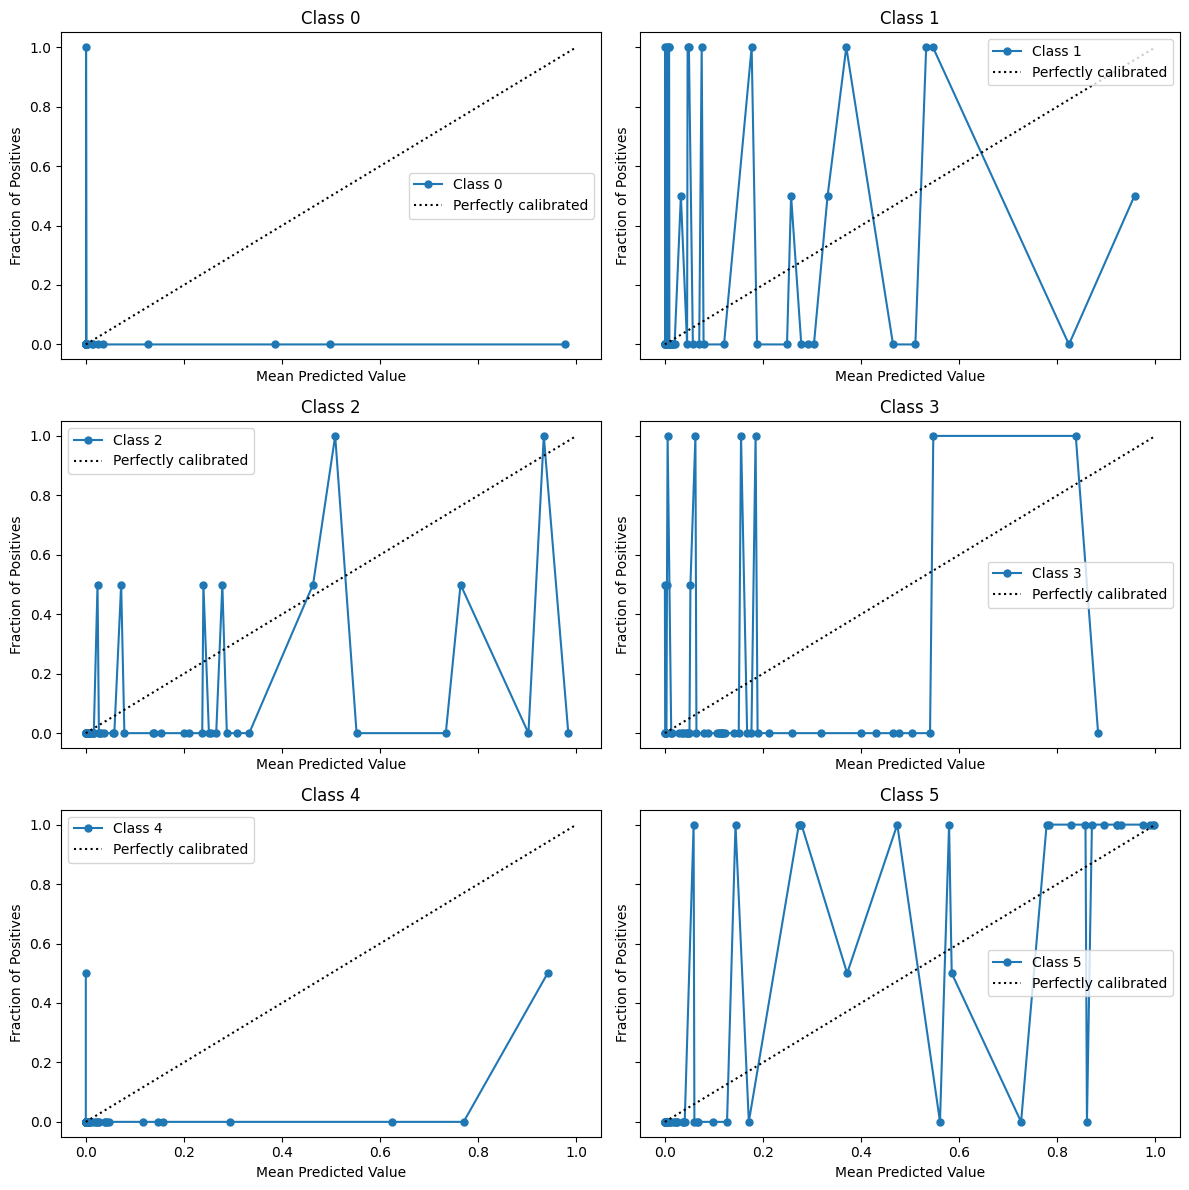

In [ ]:
plot_class_calibration(clf_log, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0154
  Brier Score (Isotonic): 0.0159
Class 1:
  Brier Score (Sigmoid): 0.1758
  Brier Score (Isotonic): 0.1270
Class 2:
  Brier Score (Sigmoid): 0.1067
  Brier Score (Isotonic): 0.0914
Class 3:
  Brier Score (Sigmoid): 0.1187
  Brier Score (Isotonic): 0.1176
Class 4:
  Brier Score (Sigmoid): 0.0289
  Brier Score (Isotonic): 0.0160
Class 5:
  Brier Score (Sigmoid): 0.1948
  Brier Score (Isotonic): 0.1104


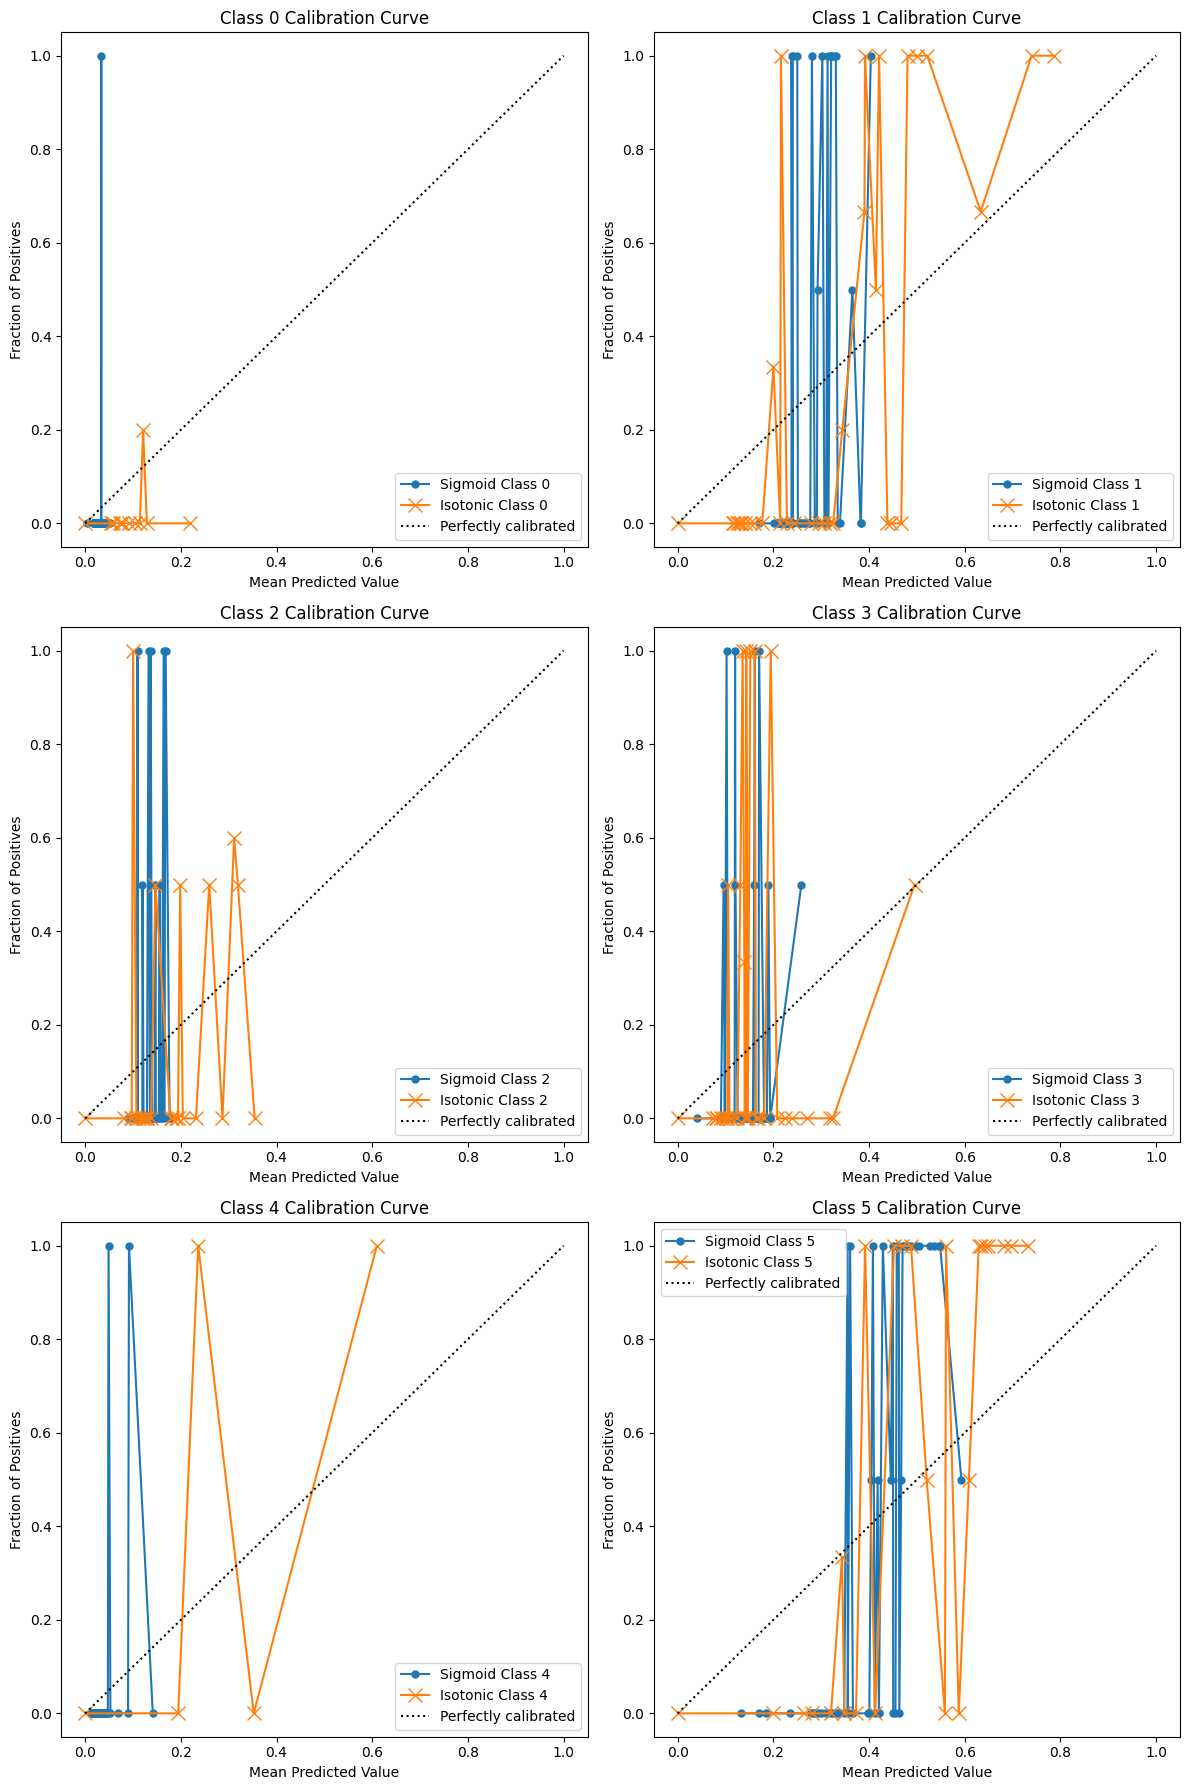

In [ ]:
cal_clf_plat_log,cal_clf_iso_log=plot_calibration_curves(clf_log, X_val, y_val)


Model accuracy: 0.5125
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 1  8  2  5  1  0]
 [ 0  0  4  3  0  1]
 [ 1  4  3  8  0  2]
 [ 0  1  1  0  1  0]
 [ 3  4  1  4  0 20]]
precision_score: 0.4264330677374155
recall_score: 0.39556100217864926
f1_score: 0.40262077104182364
Macro-average ROC AUC: 0.7942457500743644


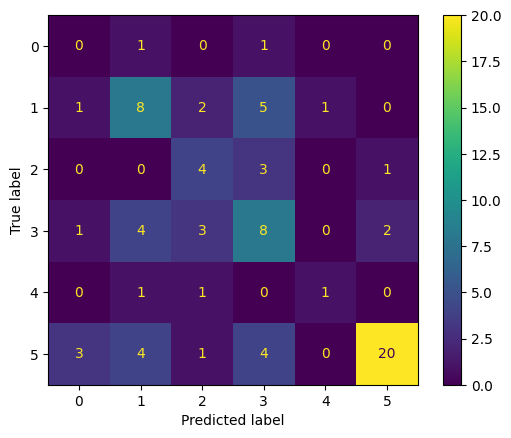

In [ ]:

evaluate_model_performance(clf_log, X_test, y_test)


Model accuracy: 0.4875
Confusion matrix:
 [[ 0  1  0  0  0  1]
 [ 0 10  0  0  0  7]
 [ 0  2  0  0  0  6]
 [ 0  3  0  0  0 15]
 [ 0  1  0  0  0  2]
 [ 0  3  0  0  0 29]]
precision_score: 0.8305555555555556
recall_score: 0.2490808823529412
f1_score: 0.19516255385820602
Macro-average ROC AUC: 0.7626204693033442


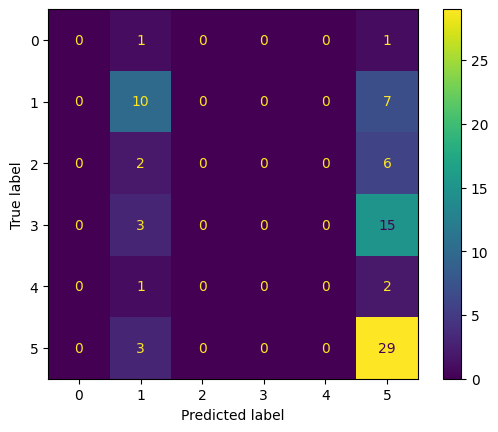

In [ ]:
evaluate_model_performance(cal_clf_plat_log, X_test, y_test)


Model accuracy: 0.55
Confusion matrix:
 [[ 0  2  0  0  0  0]
 [ 0 15  0  2  0  0]
 [ 0  3  1  1  1  2]
 [ 0  6  0  3  0  9]
 [ 0  1  0  0  0  2]
 [ 0  7  0  0  0 25]]
precision_score: 0.5998452012383901
recall_score: 0.3258782679738562
f1_score: 0.29579053843759723
Macro-average ROC AUC: 0.7857073735414802


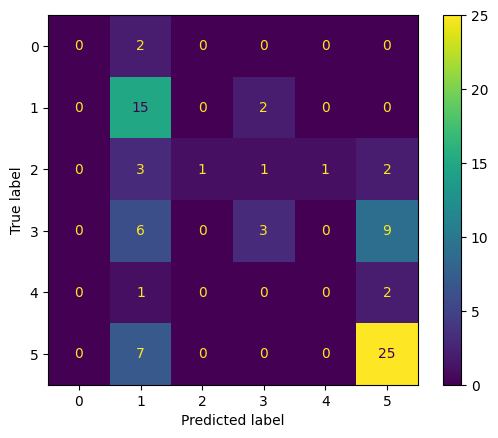

In [ ]:
evaluate_model_performance(cal_clf_iso_log, X_test, y_test)


## DecisionTreeClassifier


### fine tuning part

In [ ]:
param_dist = {
    'max_depth': [7, 9, 11, None],           
    'max_features': ['log2', 'sqrt'], 
    'max_leaf_nodes': [10, 20],
}


dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_dist,
    cv=3,                      
    scoring='accuracy',        
    n_jobs=-1,                
    verbose=2
)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

best_clf_grid = grid_search.best_estimator_

val_preds_grid = best_clf_grid.predict(X_val)
val_accuracy_grid = accuracy_score(y_val, val_preds_grid)
print(f"Validation Accuracy (grid Search): {val_accuracy_grid}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found:  {'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 20}
Validation Accuracy (grid Search): 0.5


### Calibration process

In [ ]:
clf_dt =DecisionTreeClassifier(
    ccp_alpha=0.0,
    criterion='entropy',
    max_depth=7,
    max_features=None,
    max_leaf_nodes=20,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
).fit(X_train_resampled, y_train_resampled)

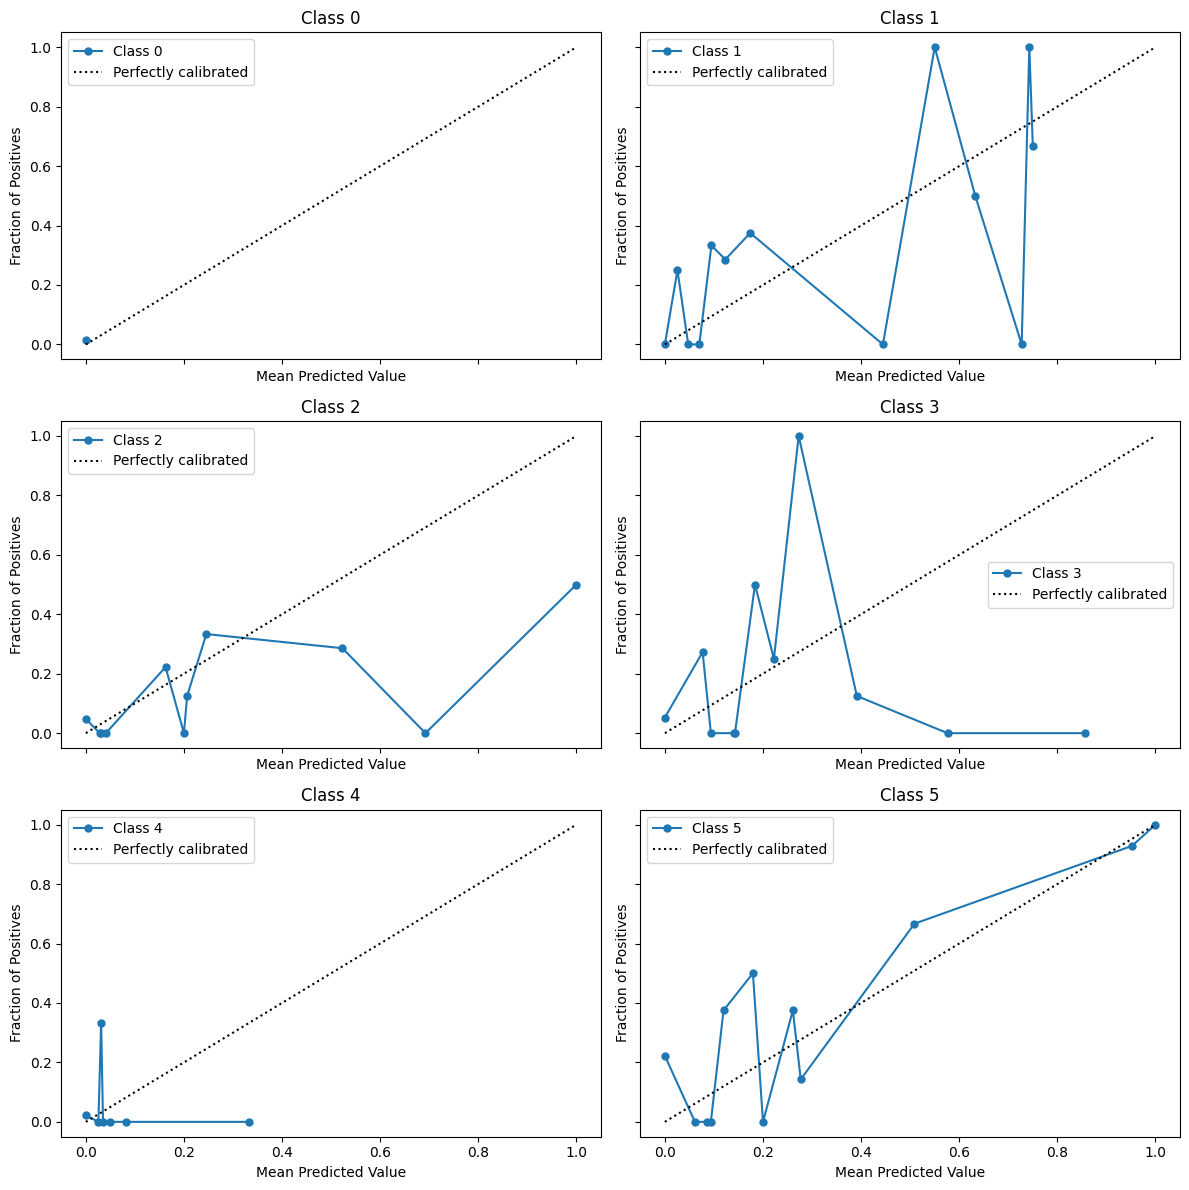

In [ ]:
plot_class_calibration(clf_dt, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0152
  Brier Score (Isotonic): 0.0154
Class 1:
  Brier Score (Sigmoid): 0.1671
  Brier Score (Isotonic): 0.1486
Class 2:
  Brier Score (Sigmoid): 0.1026
  Brier Score (Isotonic): 0.0995
Class 3:
  Brier Score (Sigmoid): 0.1190
  Brier Score (Isotonic): 0.1149
Class 4:
  Brier Score (Sigmoid): 0.0309
  Brier Score (Isotonic): 0.0304
Class 5:
  Brier Score (Sigmoid): 0.1705
  Brier Score (Isotonic): 0.1480


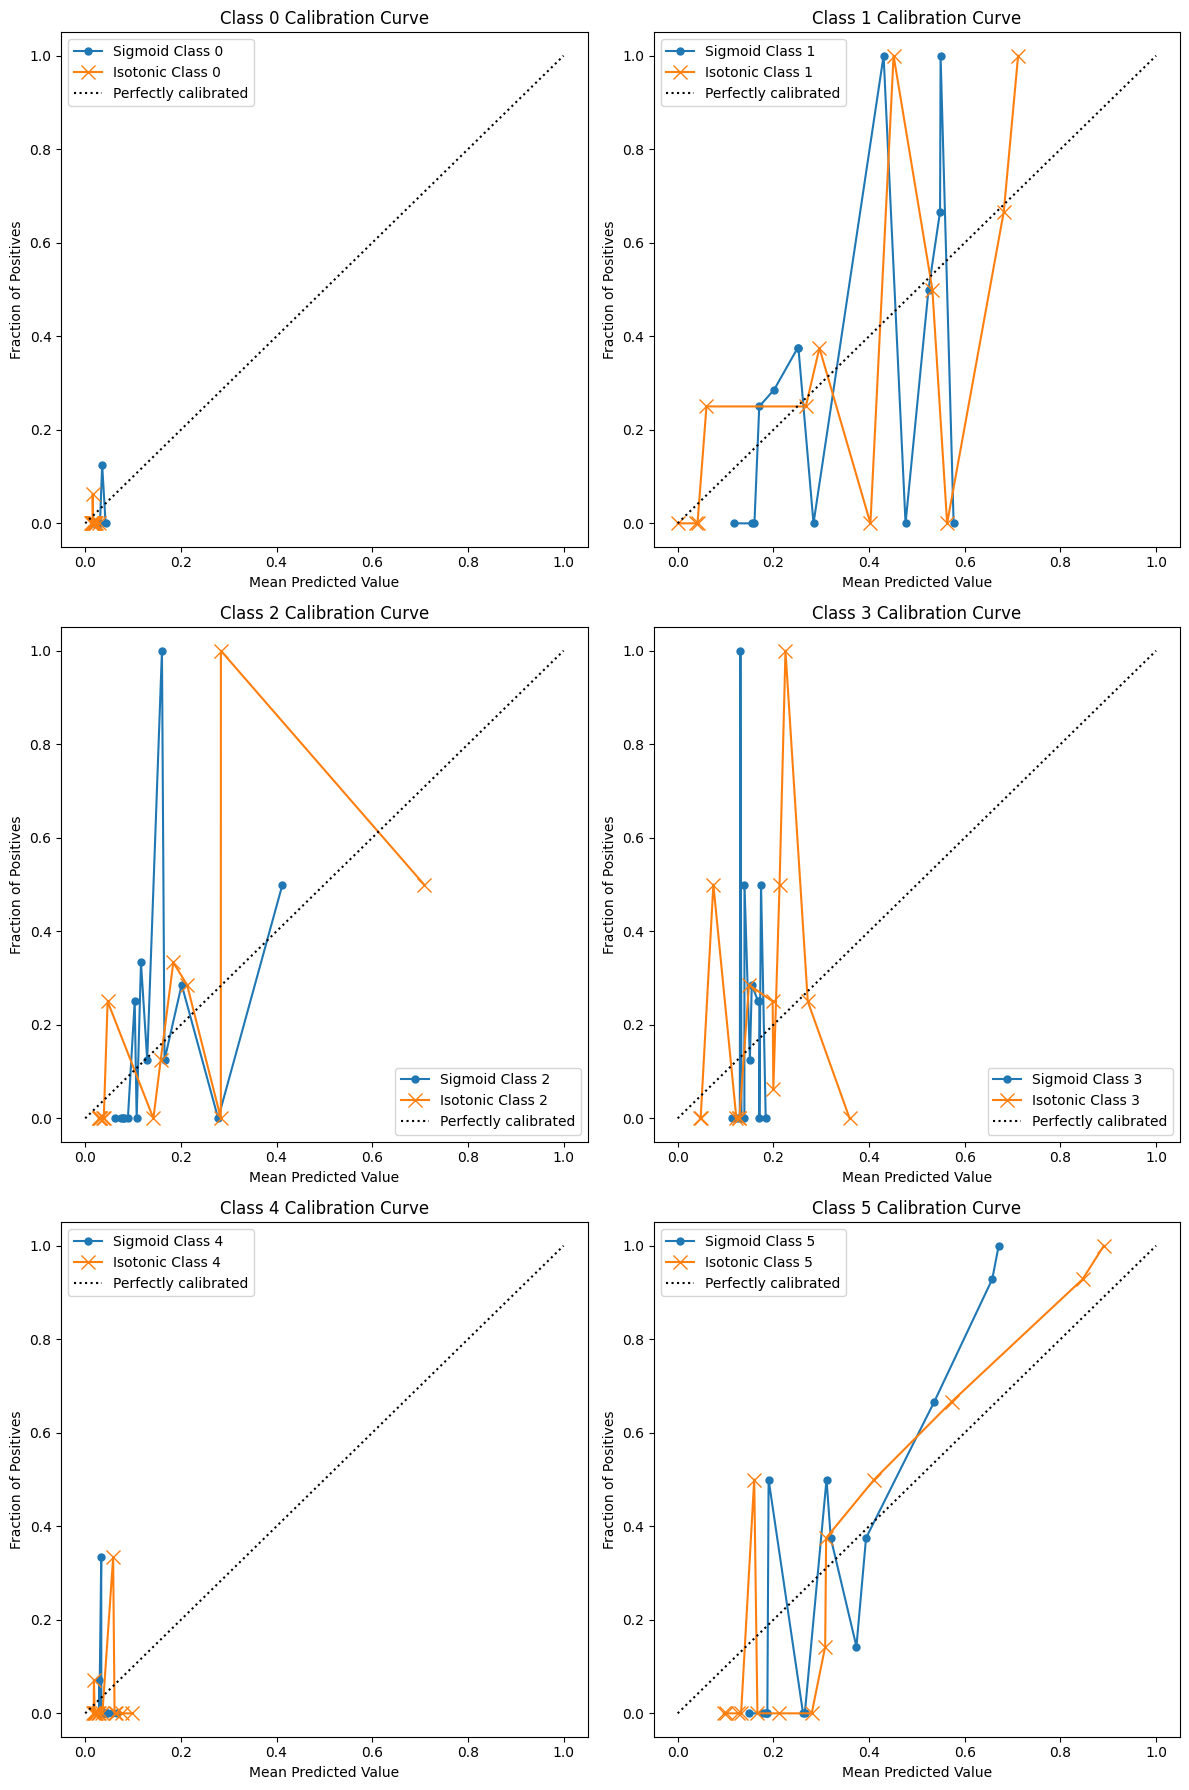

In [ ]:
cal_clf_plat_dt,cal_clf_iso_dt=plot_calibration_curves(clf_dt, X_val, y_val)


Model accuracy: 0.4375
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 1 10  5  1  0  0]
 [ 0  1  1  3  2  1]
 [ 1  4  4  7  0  2]
 [ 0  0  2  1  0  0]
 [ 2  3  4  6  0 17]]
precision_score: 0.30120614035087717
recall_score: 0.2722290305010893
f1_score: 0.2785189035189035
Macro-average ROC AUC: 0.6624581302491719


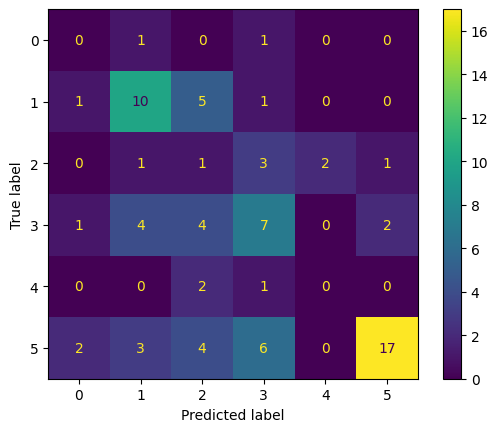

In [ ]:
evaluate_model_performance(clf_dt, X_test, y_test)


Model accuracy: 0.475
Confusion matrix:
 [[ 0  1  0  0  0  1]
 [ 0 10  1  0  0  6]
 [ 0  1  0  0  0  7]
 [ 0  5  1  0  0 12]
 [ 0  1  0  0  0  2]
 [ 0  4  0  0  0 28]]
precision_score: 0.6590909090909091
recall_score: 0.24387254901960786
f1_score: 0.1915306915306915
Macro-average ROC AUC: 0.6536217658050779


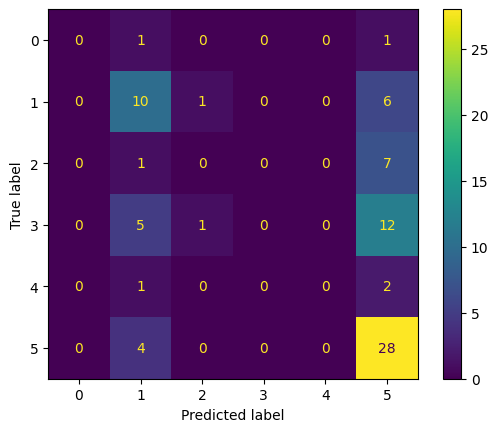

In [ ]:
evaluate_model_performance(cal_clf_plat_dt, X_test, y_test)


Model accuracy: 0.475
Confusion matrix:
 [[ 0  1  0  0  0  1]
 [ 0 10  1  0  0  6]
 [ 0  1  0  2  0  5]
 [ 0  5  1  0  0 12]
 [ 0  1  0  0  0  2]
 [ 0  4  0  0  0 28]]
precision_score: 0.49551066217732886
recall_score: 0.24387254901960786
f1_score: 0.1939972172530312
Macro-average ROC AUC: 0.6555208199511523


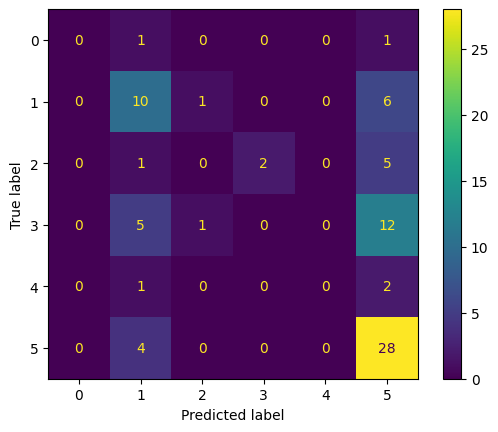

In [ ]:
evaluate_model_performance(cal_clf_iso_dt, X_test, y_test)


## MLPClassifier


### fine tune part

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(100,), (150,)],  
    'activation': ['relu', 'tanh', 'logistic'],  
    'solver': ['adam'],  
    'alpha': [0.001, 0.01], 
    'learning_rate': ['constant', 'invscaling', 'adaptive'], 
    'learning_rate_init': [0.001, 0.01],  
    'max_iter': [ 300, 400,None],  
    'epsilon': [1e-8, 1e-7],  
}
clf = MLPClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=4, verbose=1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

best_clf_grid = grid_search.best_estimator_

val_preds_grid = best_clf_grid.predict(X_val)
val_accuracy_grid = accuracy_score(y_val, val_preds_grid)
print(f"Validation Accuracy (Grid Search): {val_accuracy_grid}")

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best parameters found:  {'activation': 'logistic', 'alpha': 0.01, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 400, 'solver': 'adam'}
Validation Accuracy (Grid Search): 0.453125


### Calibration process

In [ ]:
clf_mlp = MLPClassifier(
    max_iter=400,
    learning_rate='constant',
    hidden_layer_sizes=(100,),
    alpha=0.01,
    activation="logistic",
    solver='adam',
    random_state=42,
    epsilon=1e-08,
    verbose=False
).fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


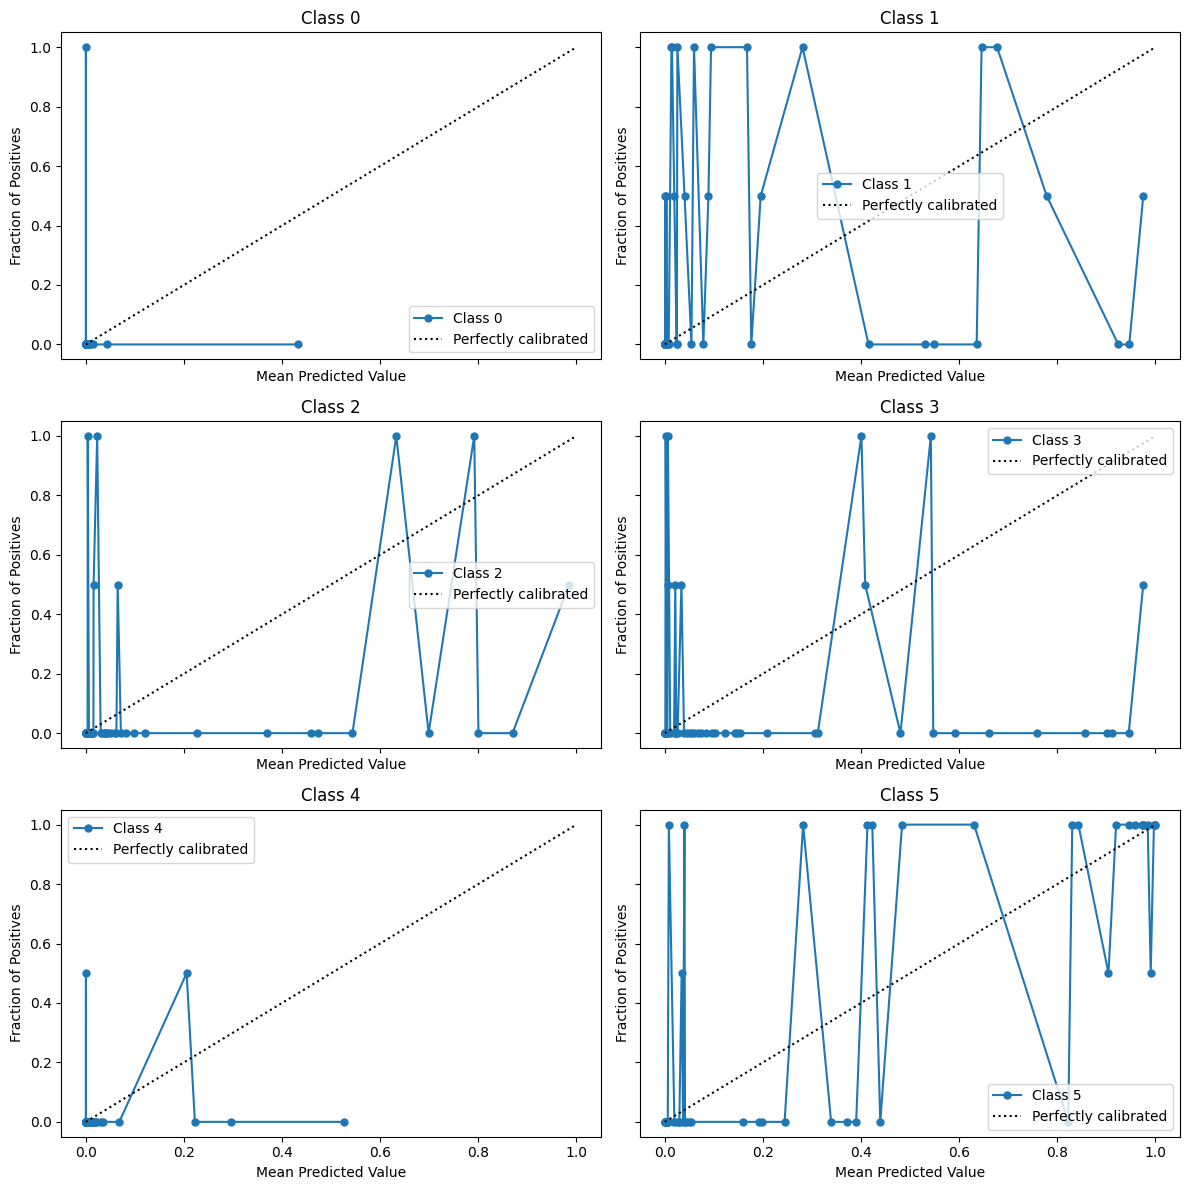

In [ ]:
plot_class_calibration(clf_mlp, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0152
  Brier Score (Isotonic): 0.0146
Class 1:
  Brier Score (Sigmoid): 0.1782
  Brier Score (Isotonic): 0.1457
Class 2:
  Brier Score (Sigmoid): 0.0939
  Brier Score (Isotonic): 0.0815
Class 3:
  Brier Score (Sigmoid): 0.1190
  Brier Score (Isotonic): 0.1166
Class 4:
  Brier Score (Sigmoid): 0.0302
  Brier Score (Isotonic): 0.0281
Class 5:
  Brier Score (Sigmoid): 0.1515
  Brier Score (Isotonic): 0.1065


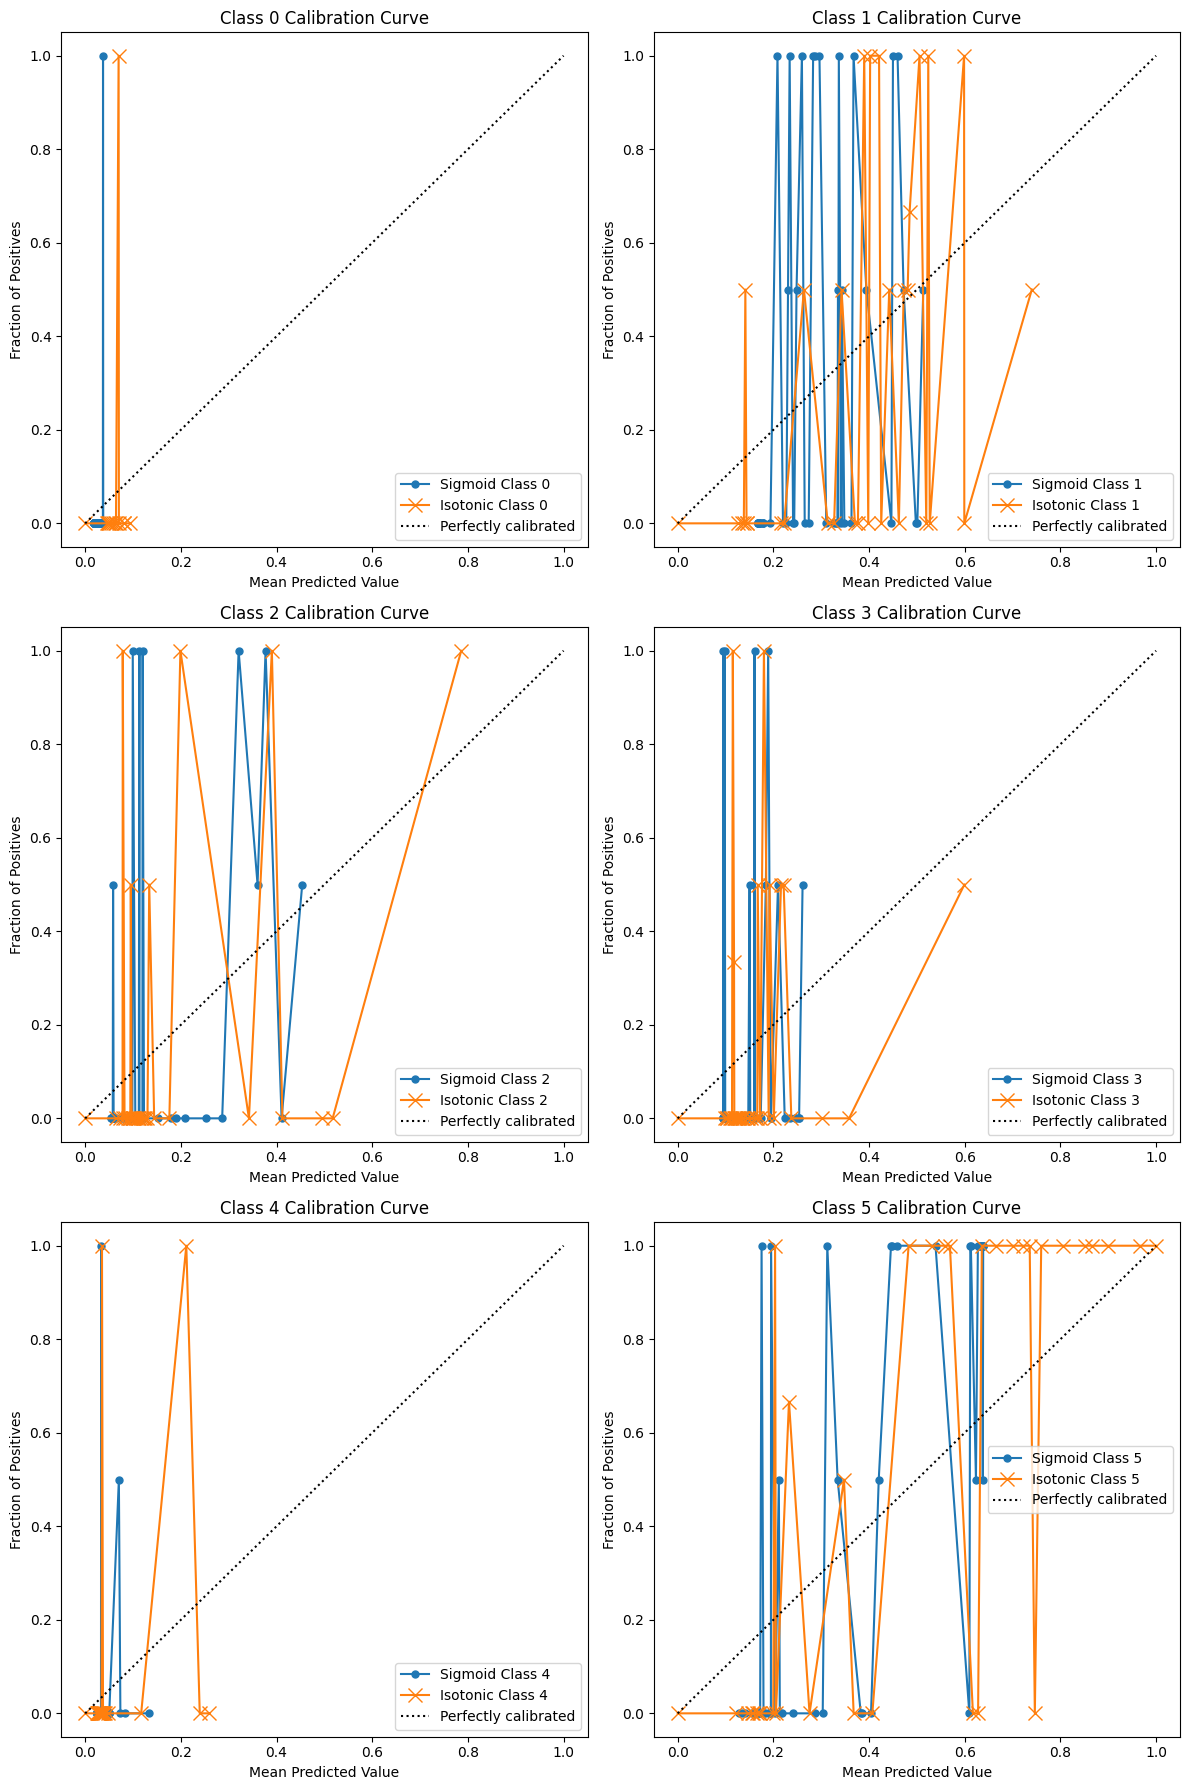

In [ ]:
cal_clf_plat_mp,cal_clf_iso_mp=plot_calibration_curves(clf_mlp, X_val, y_val)



Model accuracy: 0.6
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 1 12  3  1  0  0]
 [ 0  1  4  2  0  1]
 [ 0  5  0  8  0  5]
 [ 0  1  1  0  1  0]
 [ 1  4  0  4  0 23]]
precision_score: 0.5488505747126436
recall_score: 0.45040168845315903
f1_score: 0.468342074934732
Macro-average ROC AUC: 0.8221190693431858


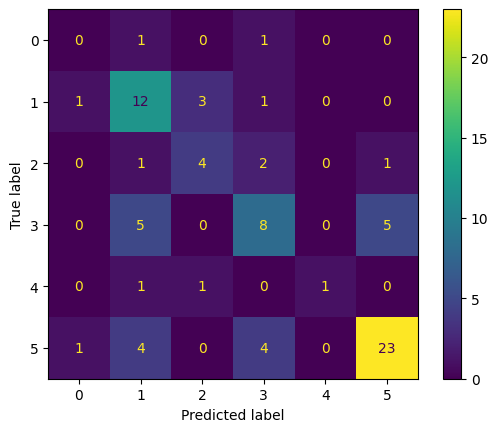

In [ ]:
evaluate_model_performance(clf_mlp, X_test, y_test)


Model accuracy: 0.5375
Confusion matrix:
 [[ 0  2  0  0  0  0]
 [ 0 15  1  0  0  1]
 [ 0  4  3  0  0  1]
 [ 0 12  0  0  0  6]
 [ 0  2  1  0  0  0]
 [ 0  7  0  0  0 25]]
precision_score: 0.7857864357864358
recall_score: 0.3397671568627451
f1_score: 0.2898739678400695
Macro-average ROC AUC: 0.8031474258422197


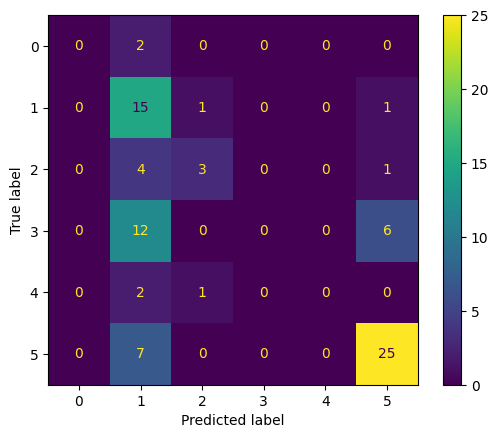

In [ ]:
evaluate_model_performance(cal_clf_plat_mp, X_test, y_test)

Model accuracy: 0.625
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 17  0  0  0  0]
 [ 0  4  2  2  0  0]
 [ 0  8  0  5  0  5]
 [ 0  1  1  0  1  0]
 [ 0  5  0  2  0 25]]
precision_score: 0.7453703703703703
recall_score: 0.44039351851851843
f1_score: 0.44479004460745175
Macro-average ROC AUC: 0.7946330759395942


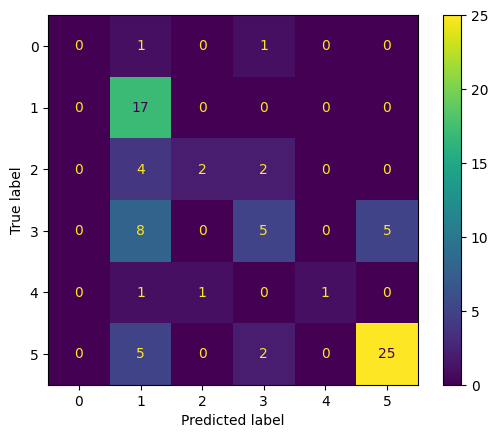

In [ ]:
evaluate_model_performance(cal_clf_iso_mp, X_test, y_test)

## GradientBoostingClassifier

In [ ]:
clf_gradientBoosting=  GradientBoostingClassifier(
    n_estimators=200,
    max_depth=9,
    learning_rate=0.1,
    min_samples_split=2,
    subsample=0.8,
    min_weight_fraction_leaf=0.01,
).fit(X_train_resampled, y_train_resampled)


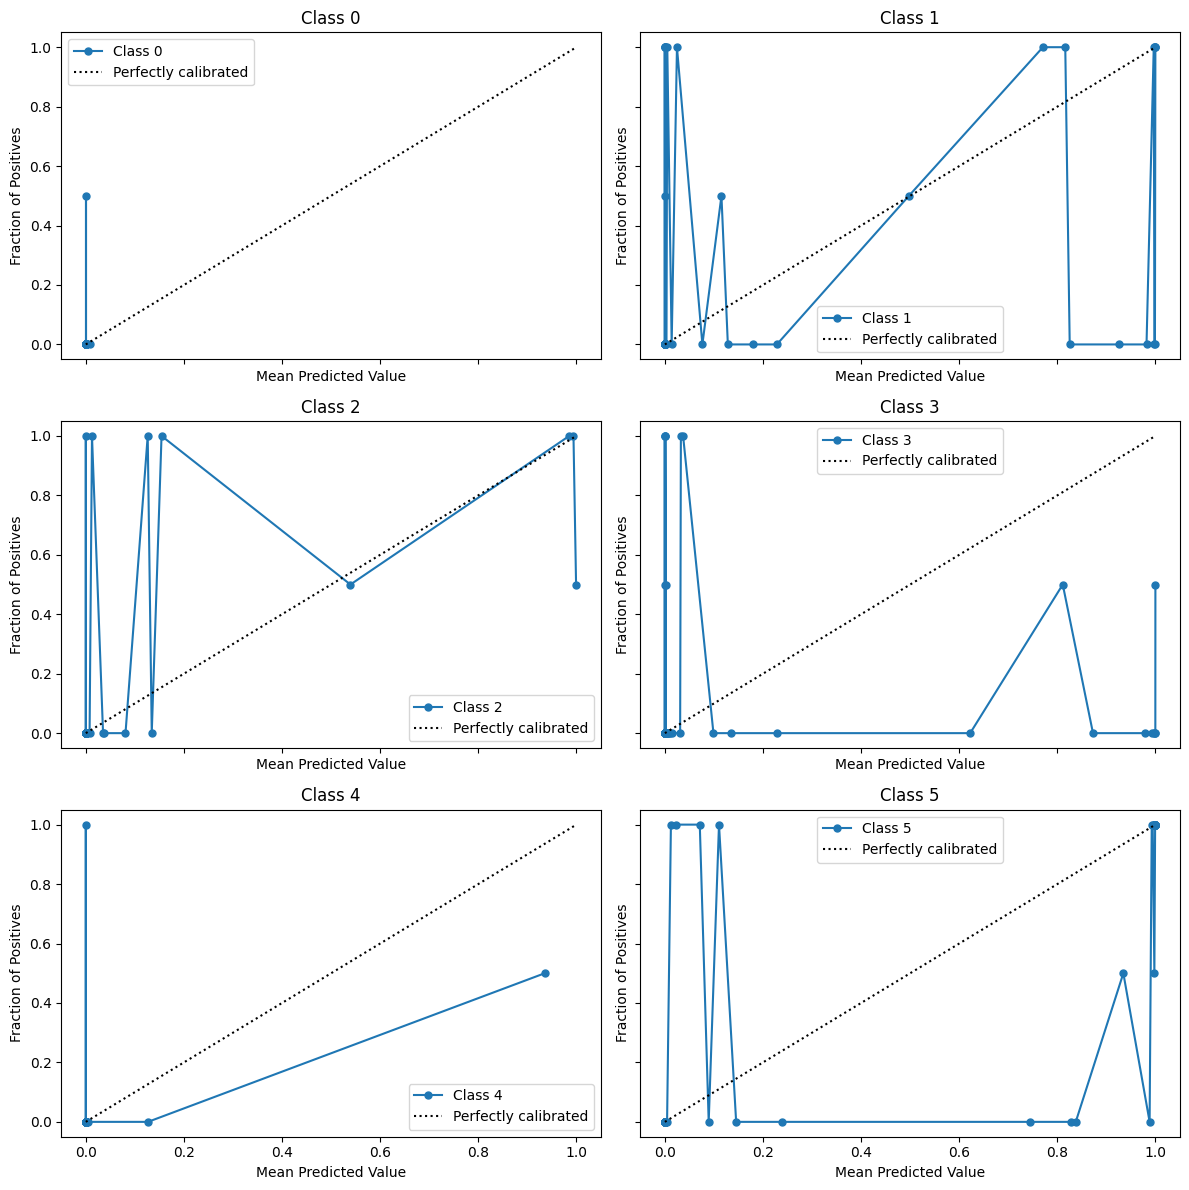

In [ ]:
plot_class_calibration(clf_gradientBoosting, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0152
  Brier Score (Isotonic): 0.0141
Class 1:
  Brier Score (Sigmoid): 0.1523
  Brier Score (Isotonic): 0.1311
Class 2:
  Brier Score (Sigmoid): 0.0813
  Brier Score (Isotonic): 0.0664
Class 3:
  Brier Score (Sigmoid): 0.1213
  Brier Score (Isotonic): 0.1084
Class 4:
  Brier Score (Sigmoid): 0.0276
  Brier Score (Isotonic): 0.0237
Class 5:
  Brier Score (Sigmoid): 0.1094
  Brier Score (Isotonic): 0.0872


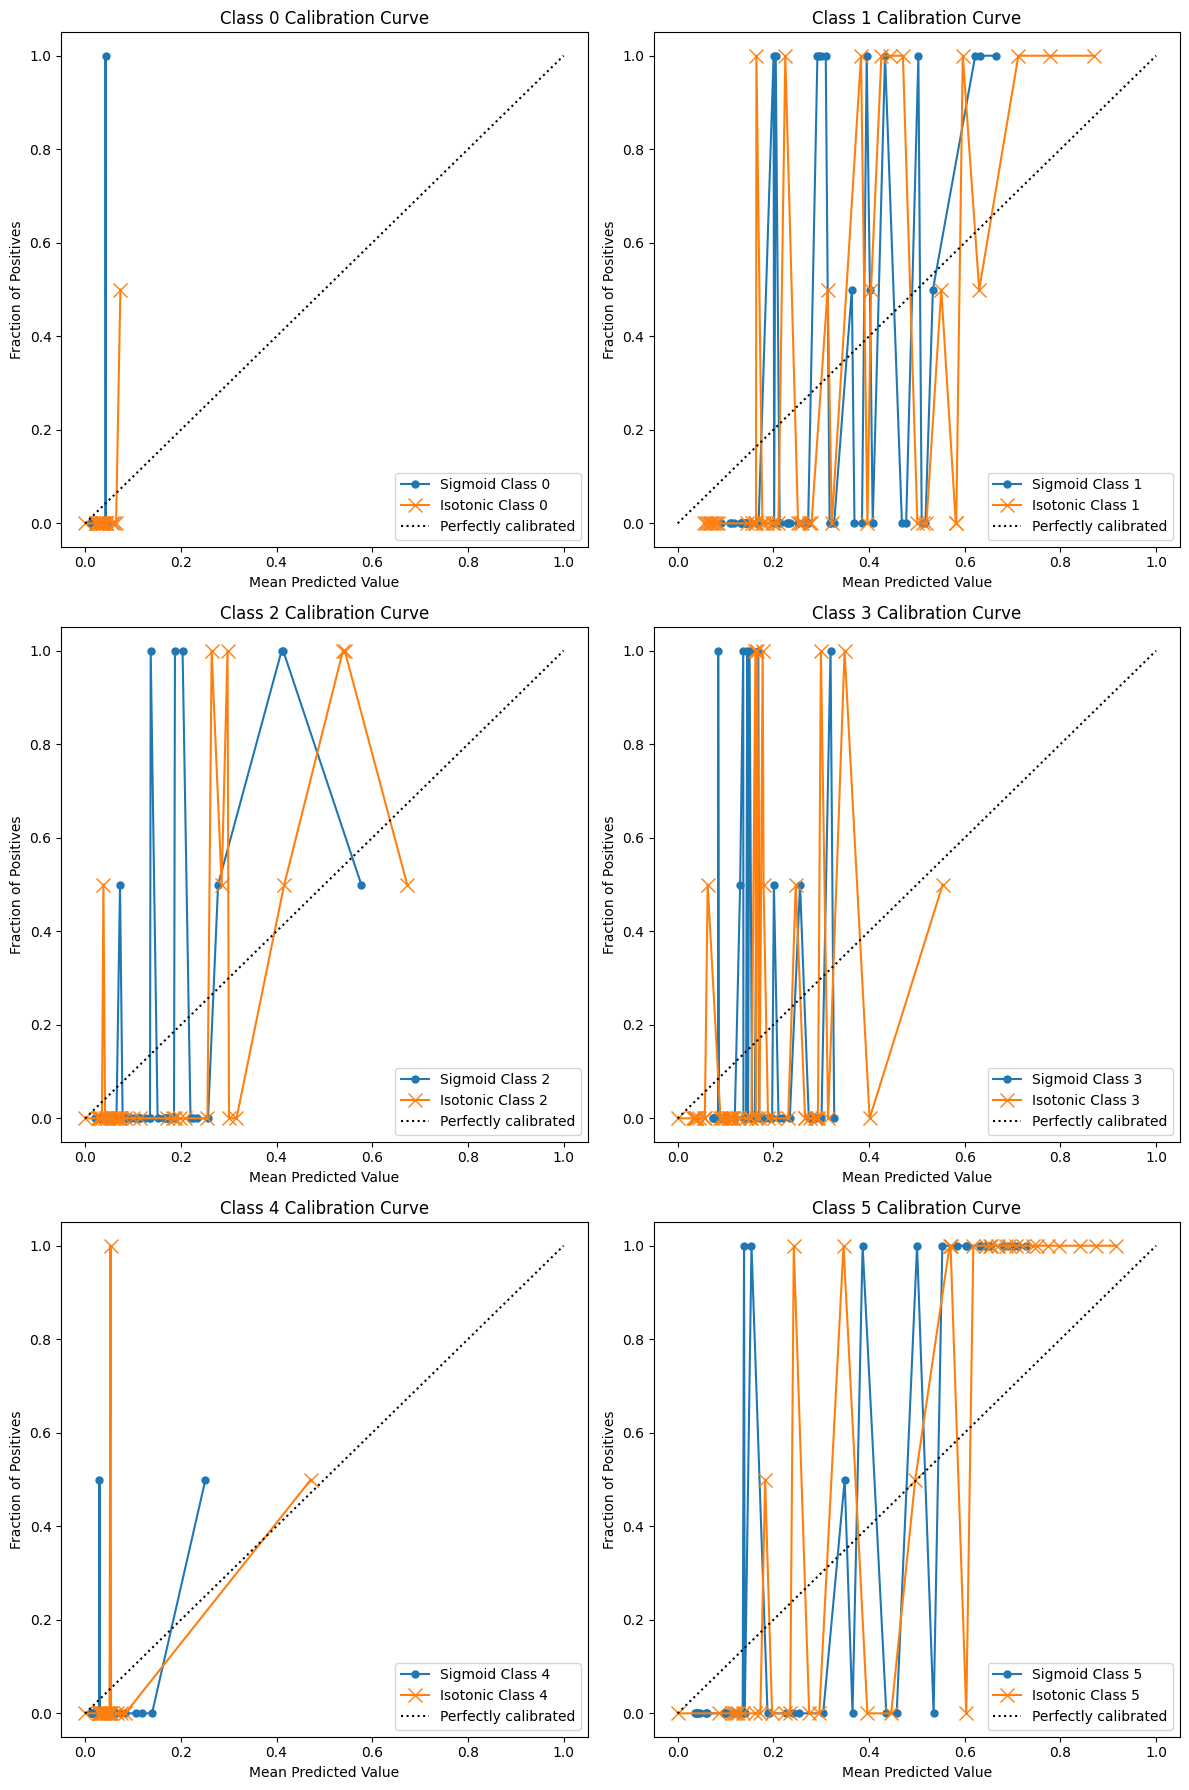

In [ ]:
cal_clf_plat_gradientBoosting,cal_clf_iso_gradientBoosting=plot_calibration_curves(clf_gradientBoosting, X_val, y_val)


Model accuracy: 0.5625
Confusion matrix:
 [[ 1  0  0  1  0  0]
 [ 0 12  2  2  1  0]
 [ 0  2  2  2  0  2]
 [ 0  7  3  4  1  3]
 [ 0  1  1  0  0  1]
 [ 0  2  0  4  0 26]]
precision_score: 0.4783653846153846
recall_score: 0.41510076252723316
f1_score: 0.42876617274237255
Macro-average ROC AUC: 0.8160939310948204


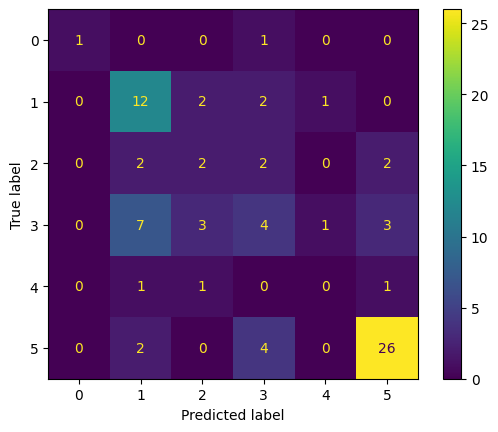

In [ ]:
evaluate_model_performance(clf_gradientBoosting, X_test, y_test)


Model accuracy: 0.525
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 13  2  0  1  1]
 [ 0  3  2  1  0  2]
 [ 0 11  3  0  0  4]
 [ 0  1  1  0  0  1]
 [ 0  5  0  0  0 27]]
precision_score: 0.4006302521008403
recall_score: 0.30974264705882354
f1_score: 0.2609623451370598
Macro-average ROC AUC: 0.7755245465697463


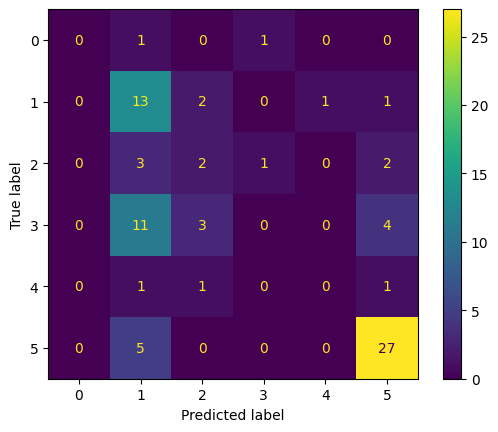

In [ ]:
evaluate_model_performance(cal_clf_plat_gradientBoosting, X_test, y_test)


Model accuracy: 0.55
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 14  2  0  1  0]
 [ 0  3  3  1  0  1]
 [ 0 10  4  0  1  3]
 [ 0  1  1  0  0  1]
 [ 0  3  0  2  0 27]]
precision_score: 0.4302083333333333
recall_score: 0.34037990196078427
f1_score: 0.29141865079365076
Macro-average ROC AUC: 0.8374321879745786


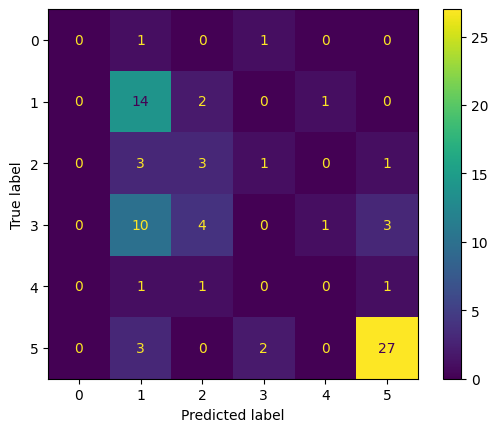

In [ ]:
evaluate_model_performance(cal_clf_iso_gradientBoosting, X_test, y_test)


## XGBClassifier

### Fine tuning part

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [7, 9, 11,None],              
    'learning_rate': [0.01, 0.1],          
    'subsample': [0.8, 1.0]             
}

xgb = XGBClassifier(eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
best_xgb = grid_search.best_estimator_

val_preds = best_xgb.predict(X_val)
print(f'Model accuracy: {accuracy_score(y_val, val_preds)}')


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.95
Model accuracy: 0.578125


### Calibration process

In [ ]:
clf_gradientBoosting= GradientBoostingClassifier(
    n_estimators=200,           
    max_depth=7,               
    learning_rate=0.1           
    ,min_samples_split=2,
    subsample=0.8
).fit(X_train_resampled, y_train_resampled)

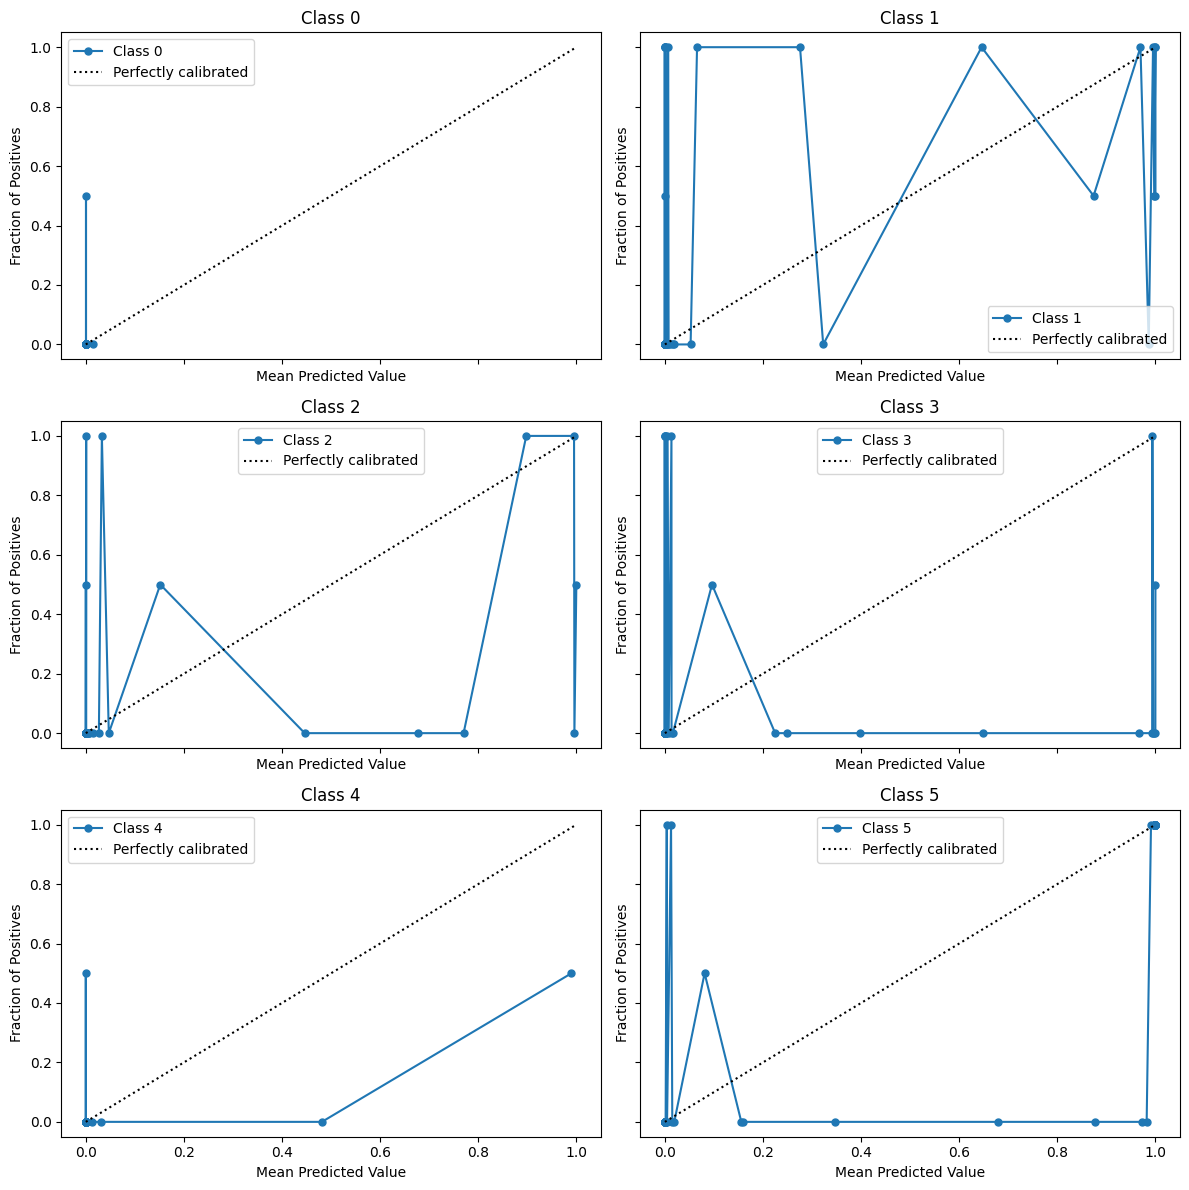

In [ ]:
plot_class_calibration(clf_gradientBoosting, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0151
  Brier Score (Isotonic): 0.0117
Class 1:
  Brier Score (Sigmoid): 0.1491
  Brier Score (Isotonic): 0.1226
Class 2:
  Brier Score (Sigmoid): 0.0854
  Brier Score (Isotonic): 0.0645
Class 3:
  Brier Score (Sigmoid): 0.1200
  Brier Score (Isotonic): 0.1113
Class 4:
  Brier Score (Sigmoid): 0.0270
  Brier Score (Isotonic): 0.0250
Class 5:
  Brier Score (Sigmoid): 0.1004
  Brier Score (Isotonic): 0.0659


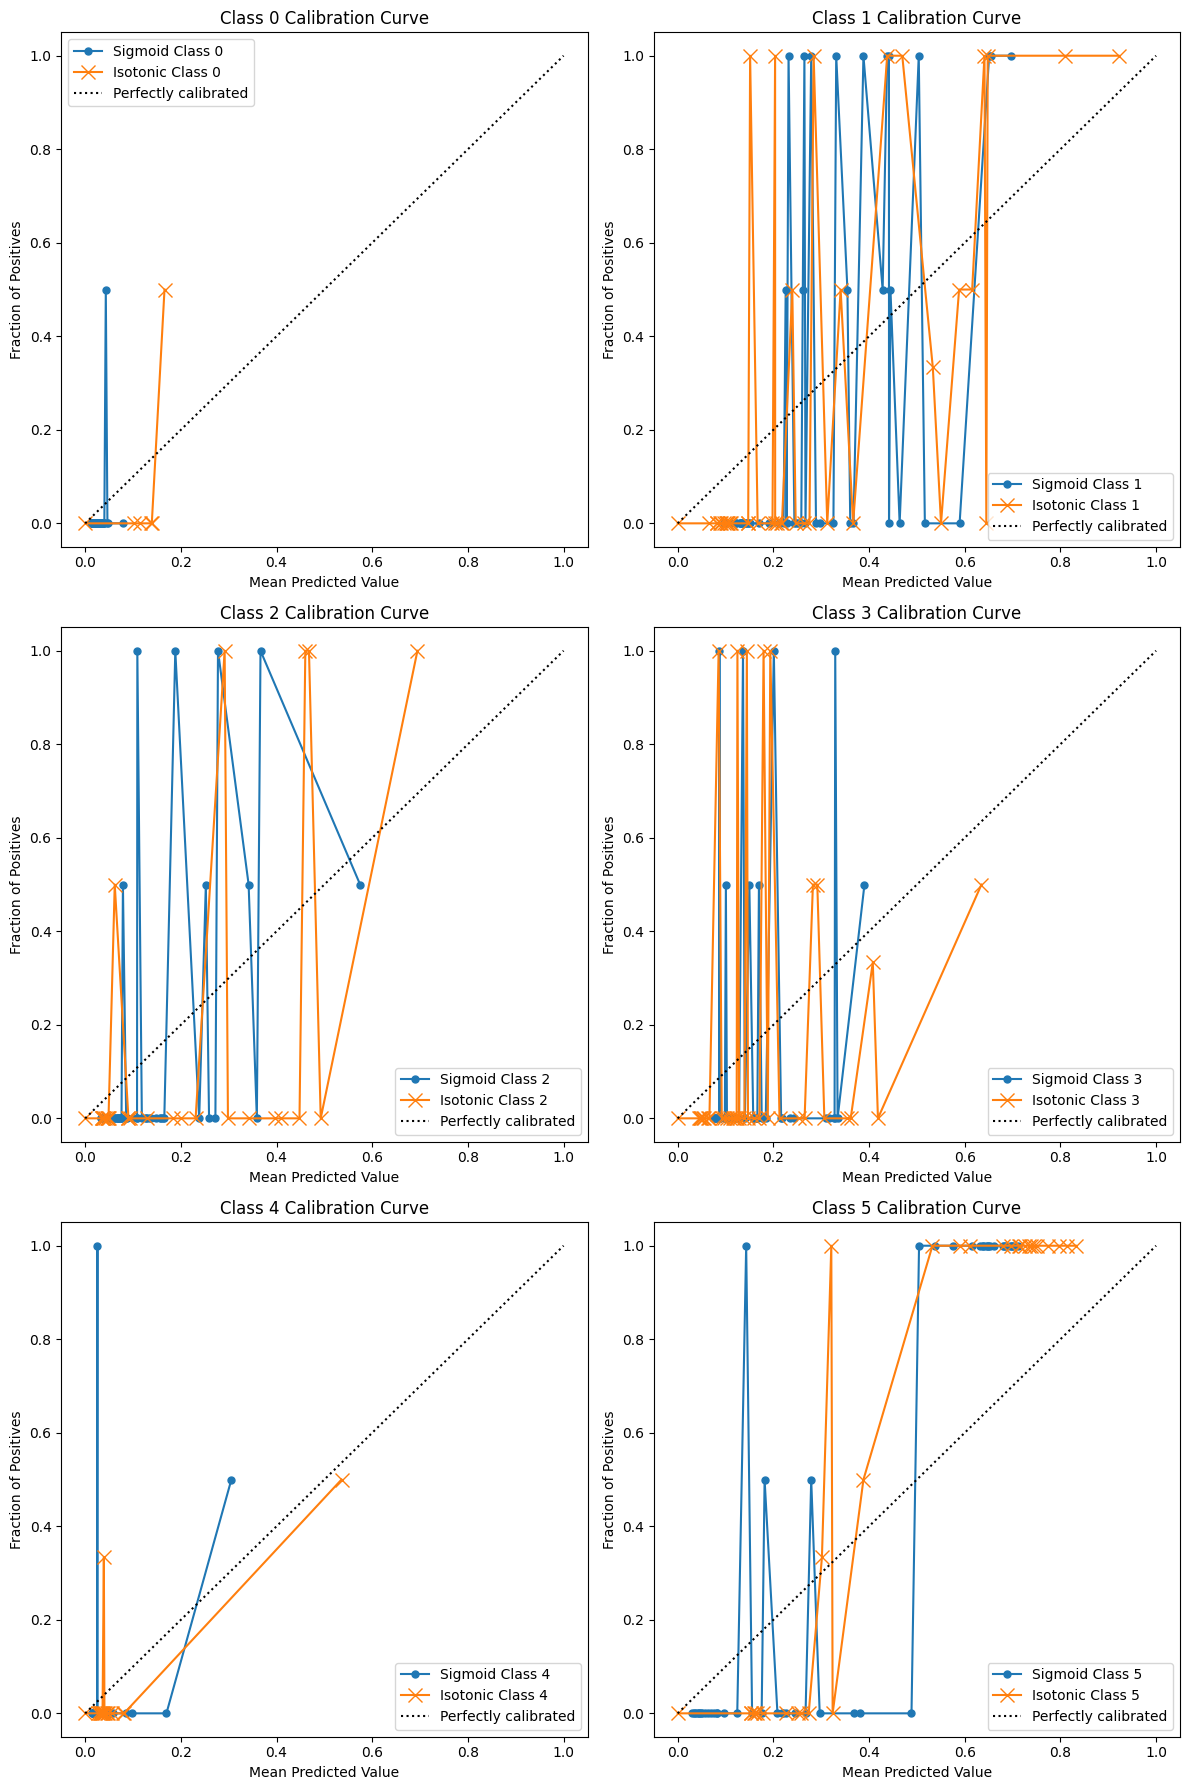

In [ ]:
cal_clf_plat_gradientBoosting,cal_clf_iso_gradientBoosting=plot_calibration_curves(clf_gradientBoosting, X_val, y_val)


Model accuracy: 0.5375
Confusion matrix:
 [[ 1  0  0  1  0  0]
 [ 0  9  3  1  1  3]
 [ 0  3  3  2  0  0]
 [ 0  7  4  4  1  2]
 [ 0  1  2  0  0  0]
 [ 0  2  0  4  0 26]]
precision_score: 0.4718556533072662
recall_score: 0.4065223311546841
f1_score: 0.42004477004477003
Macro-average ROC AUC: 0.7639573020154438


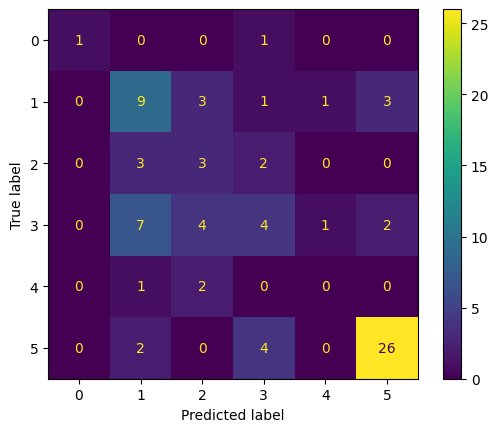

In [ ]:
evaluate_model_performance(clf_gradientBoosting, X_test, y_test)


Model accuracy: 0.5375
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 15  1  0  1  0]
 [ 0  4  2  1  0  1]
 [ 0 12  1  1  1  3]
 [ 0  1  1  0  0  1]
 [ 0  6  0  1  0 25]]
precision_score: 0.477991452991453
recall_score: 0.32819308278867104
f1_score: 0.29012788286981833
Macro-average ROC AUC: 0.8089873747394947


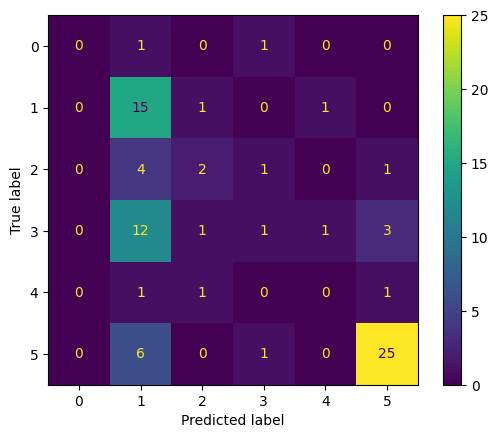

In [ ]:
evaluate_model_performance(cal_clf_plat_gradientBoosting, X_test, y_test)


Model accuracy: 0.5625
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 13  3  0  1  0]
 [ 0  3  3  2  0  0]
 [ 0  8  4  2  1  3]
 [ 0  1  2  0  0  0]
 [ 0  3  1  1  0 27]]
precision_score: 0.4853964043619216
recall_score: 0.3490944989106754
f1_score: 0.3147610142701307
Macro-average ROC AUC: 0.765100637632362


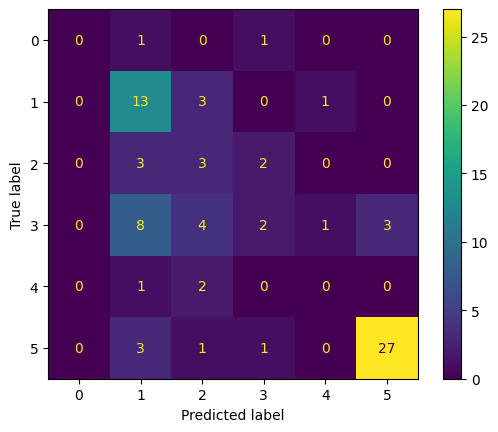

In [ ]:
evaluate_model_performance(cal_clf_iso_gradientBoosting, X_test, y_test)

## LGBMClassifier


In [ ]:
clf_lightgbm= LGBMClassifier(
    colsample_bytree=1,
    n_estimators=150,           
    max_depth=11,
    subsample=1,
    learning_rate=0.1,          
    min_child_samples=2,
    min_child_weight=0.01
).fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10329
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 53
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

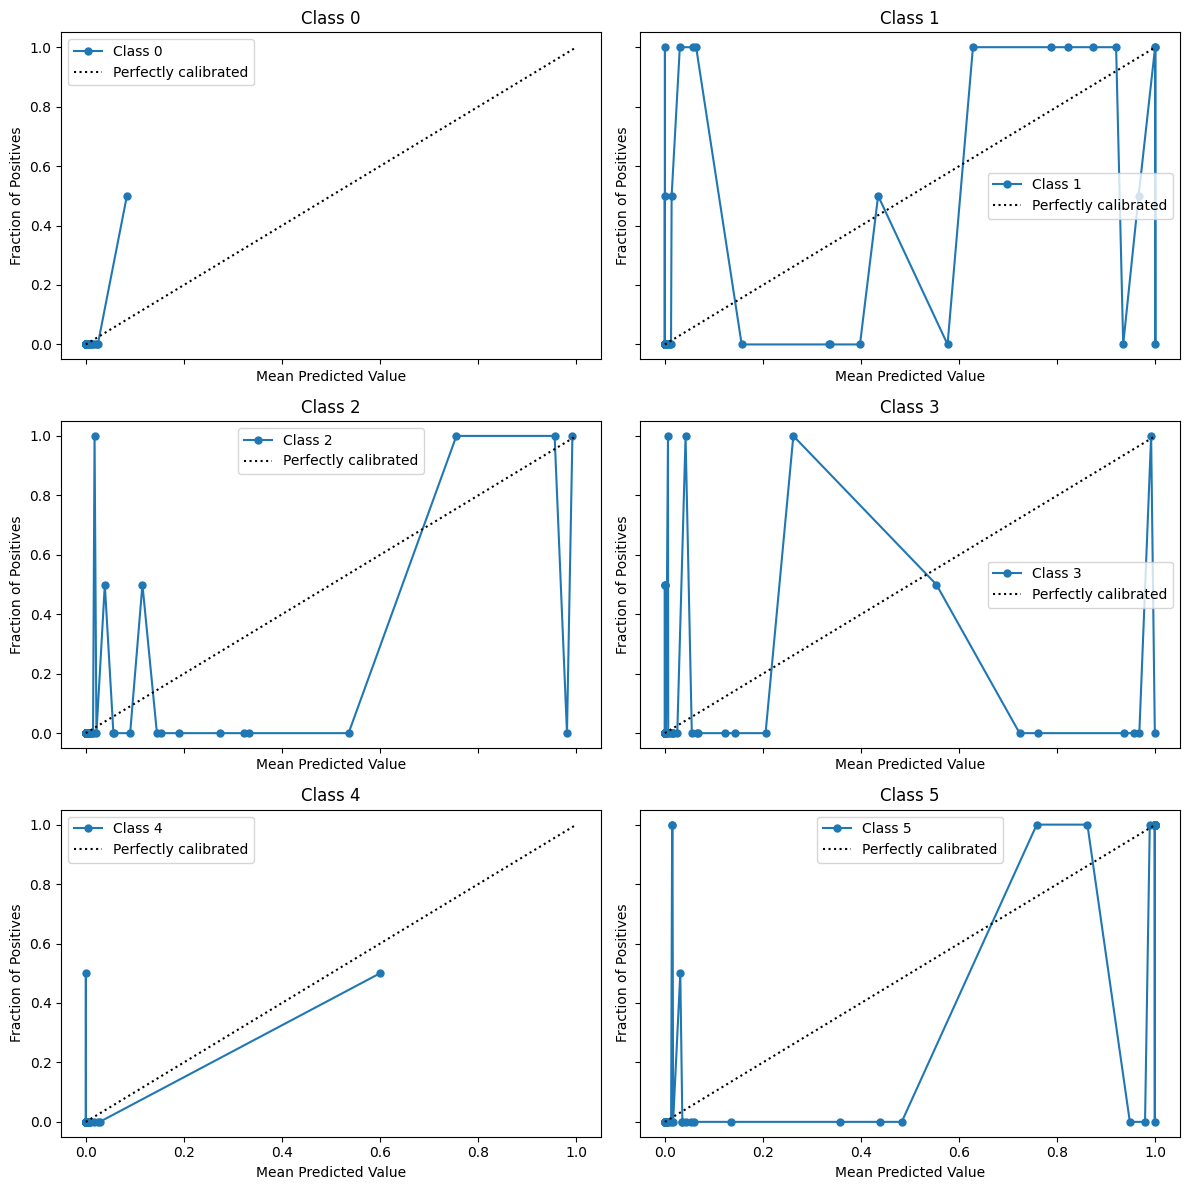

In [ ]:
plot_class_calibration(clf_lightgbm, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0136
  Brier Score (Isotonic): 0.0042
Class 1:
  Brier Score (Sigmoid): 0.1298
  Brier Score (Isotonic): 0.1152
Class 2:
  Brier Score (Sigmoid): 0.0679
  Brier Score (Isotonic): 0.0546
Class 3:
  Brier Score (Sigmoid): 0.1245
  Brier Score (Isotonic): 0.1213
Class 4:
  Brier Score (Sigmoid): 0.0227
  Brier Score (Isotonic): 0.0171
Class 5:
  Brier Score (Sigmoid): 0.1050
  Brier Score (Isotonic): 0.0601


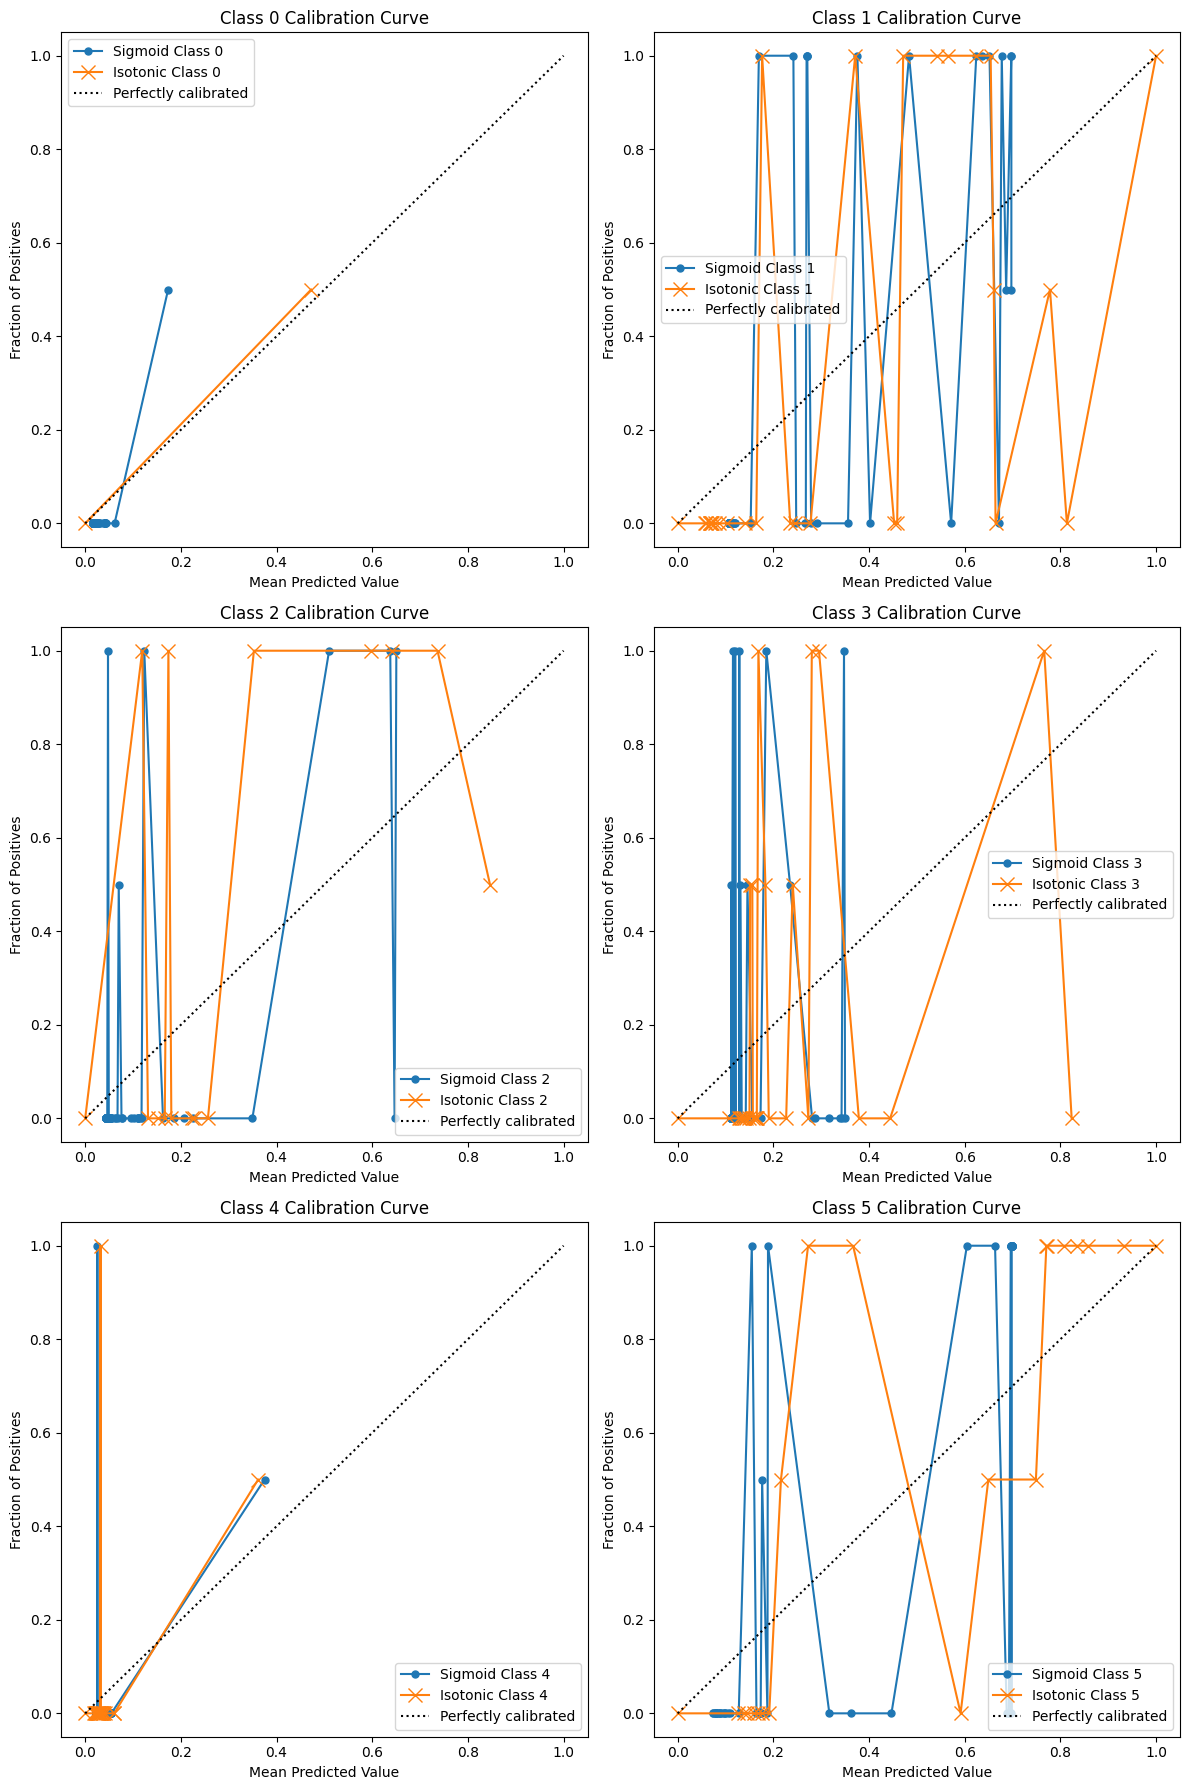

In [ ]:
cal_clf_plat_lightgbm,cal_clf_iso_lightgbm=plot_calibration_curves(clf_lightgbm, X_val, y_val)


Model accuracy: 0.6
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 13  2  1  1  0]
 [ 0  3  2  2  0  1]
 [ 0  5  4  6  0  3]
 [ 0  1  1  0  0  1]
 [ 0  3  0  2  0 27]]
precision_score: 0.5109953703703703
recall_score: 0.365298202614379
f1_score: 0.3472825467396261
Macro-average ROC AUC: 0.8228607301373253


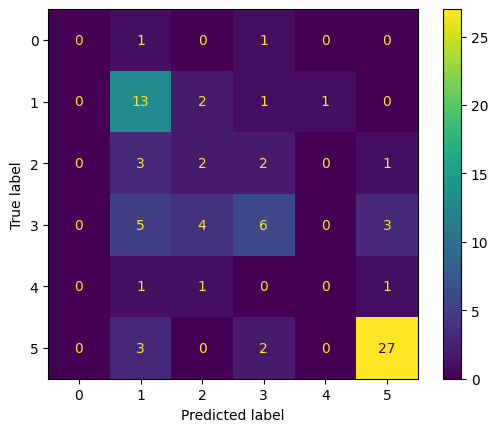

In [ ]:
evaluate_model_performance(clf_lightgbm, X_test, y_test)


Model accuracy: 0.5875
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 14  2  1  0  0]
 [ 0  3  2  2  0  1]
 [ 0  5  4  4  0  5]
 [ 0  1  1  0  0  1]
 [ 0  3  0  2  0 27]]
precision_score: 0.6558097312999274
recall_score: 0.356583605664488
f1_score: 0.3292589763177998
Macro-average ROC AUC: 0.7713769719243658


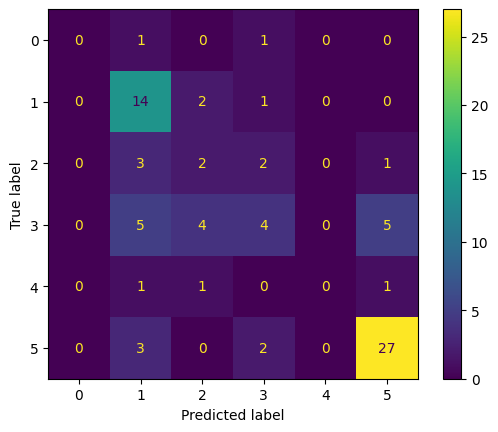

In [ ]:
evaluate_model_performance(cal_clf_plat_lightgbm, X_test, y_test)


Model accuracy: 0.575
Confusion matrix:
 [[ 0  2  0  0  0  0]
 [ 1 14  2  0  0  0]
 [ 0  4  2  1  0  1]
 [ 1  7  4  5  0  1]
 [ 0  1  1  0  0  1]
 [ 0  5  0  2  0 25]]
precision_score: 0.5273869648869648
recall_score: 0.3554261982570806
f1_score: 0.33554047259929615
Macro-average ROC AUC: 0.7149431296291843


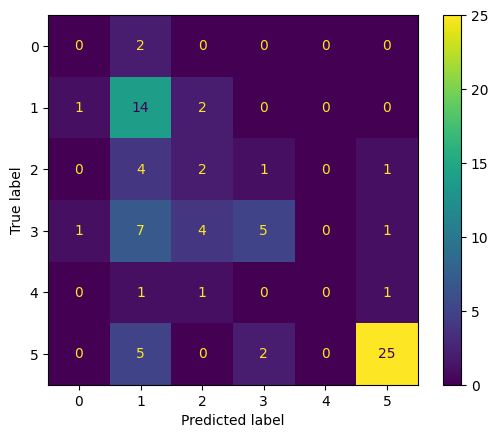

In [ ]:
evaluate_model_performance(cal_clf_iso_lightgbm, X_test, y_test)


## AdaBoostClassifier

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=11,min_samples_split=2)

clf_adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=250,
    learning_rate=0.1,
).fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


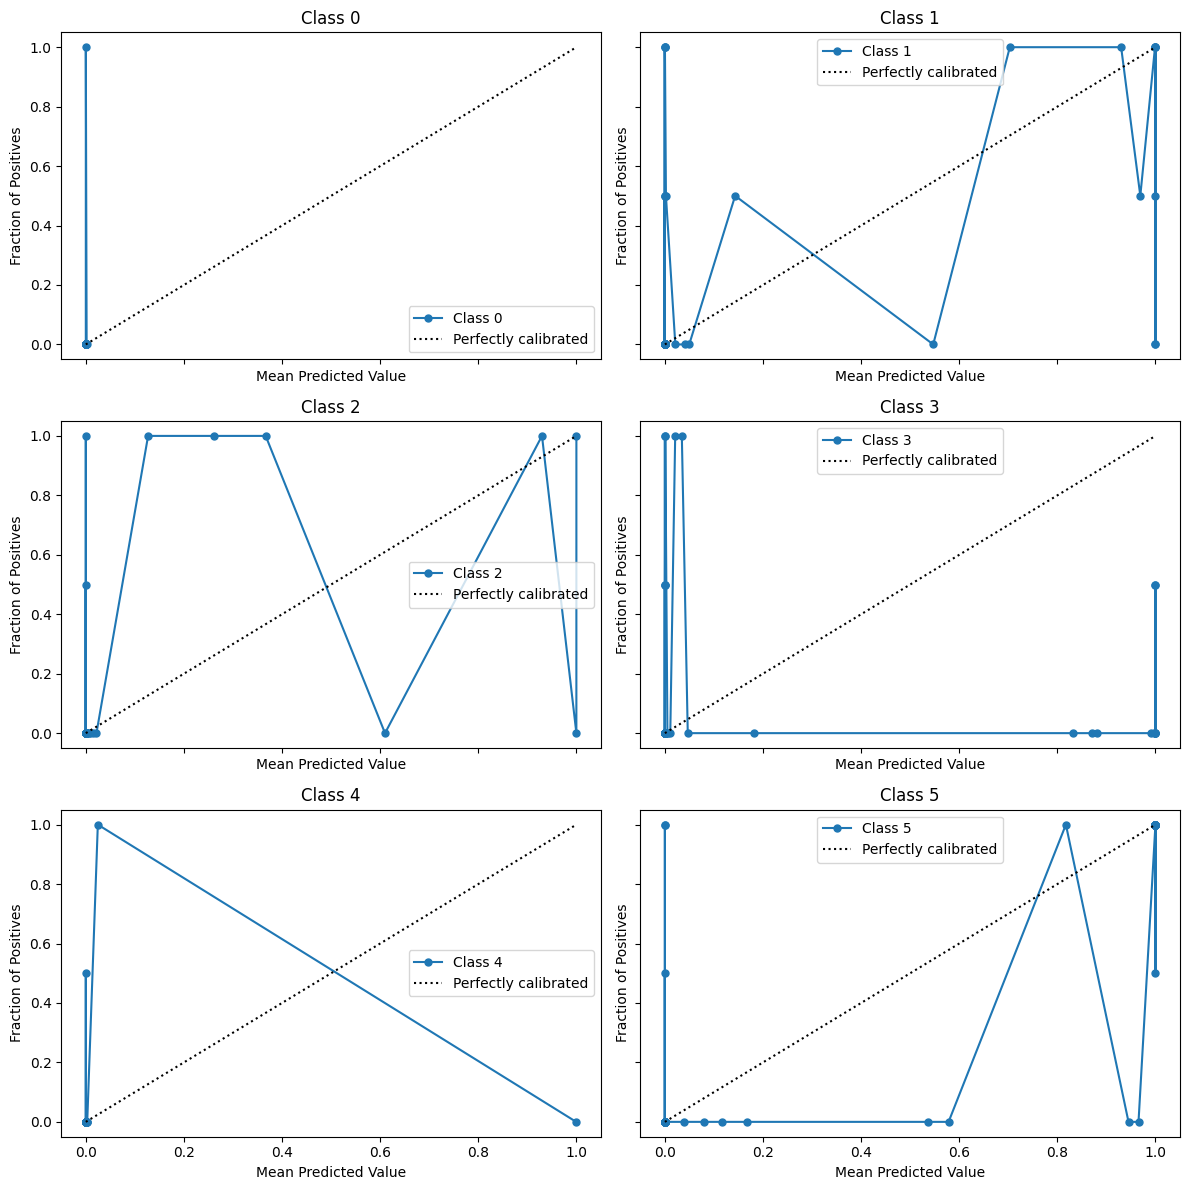

In [ ]:
plot_class_calibration(clf_adaboost, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0152
  Brier Score (Isotonic): 0.0114
Class 1:
  Brier Score (Sigmoid): 0.1413
  Brier Score (Isotonic): 0.1223
Class 2:
  Brier Score (Sigmoid): 0.0751
  Brier Score (Isotonic): 0.0685
Class 3:
  Brier Score (Sigmoid): 0.1192
  Brier Score (Isotonic): 0.1021
Class 4:
  Brier Score (Sigmoid): 0.0306
  Brier Score (Isotonic): 0.0267
Class 5:
  Brier Score (Sigmoid): 0.1086
  Brier Score (Isotonic): 0.0721


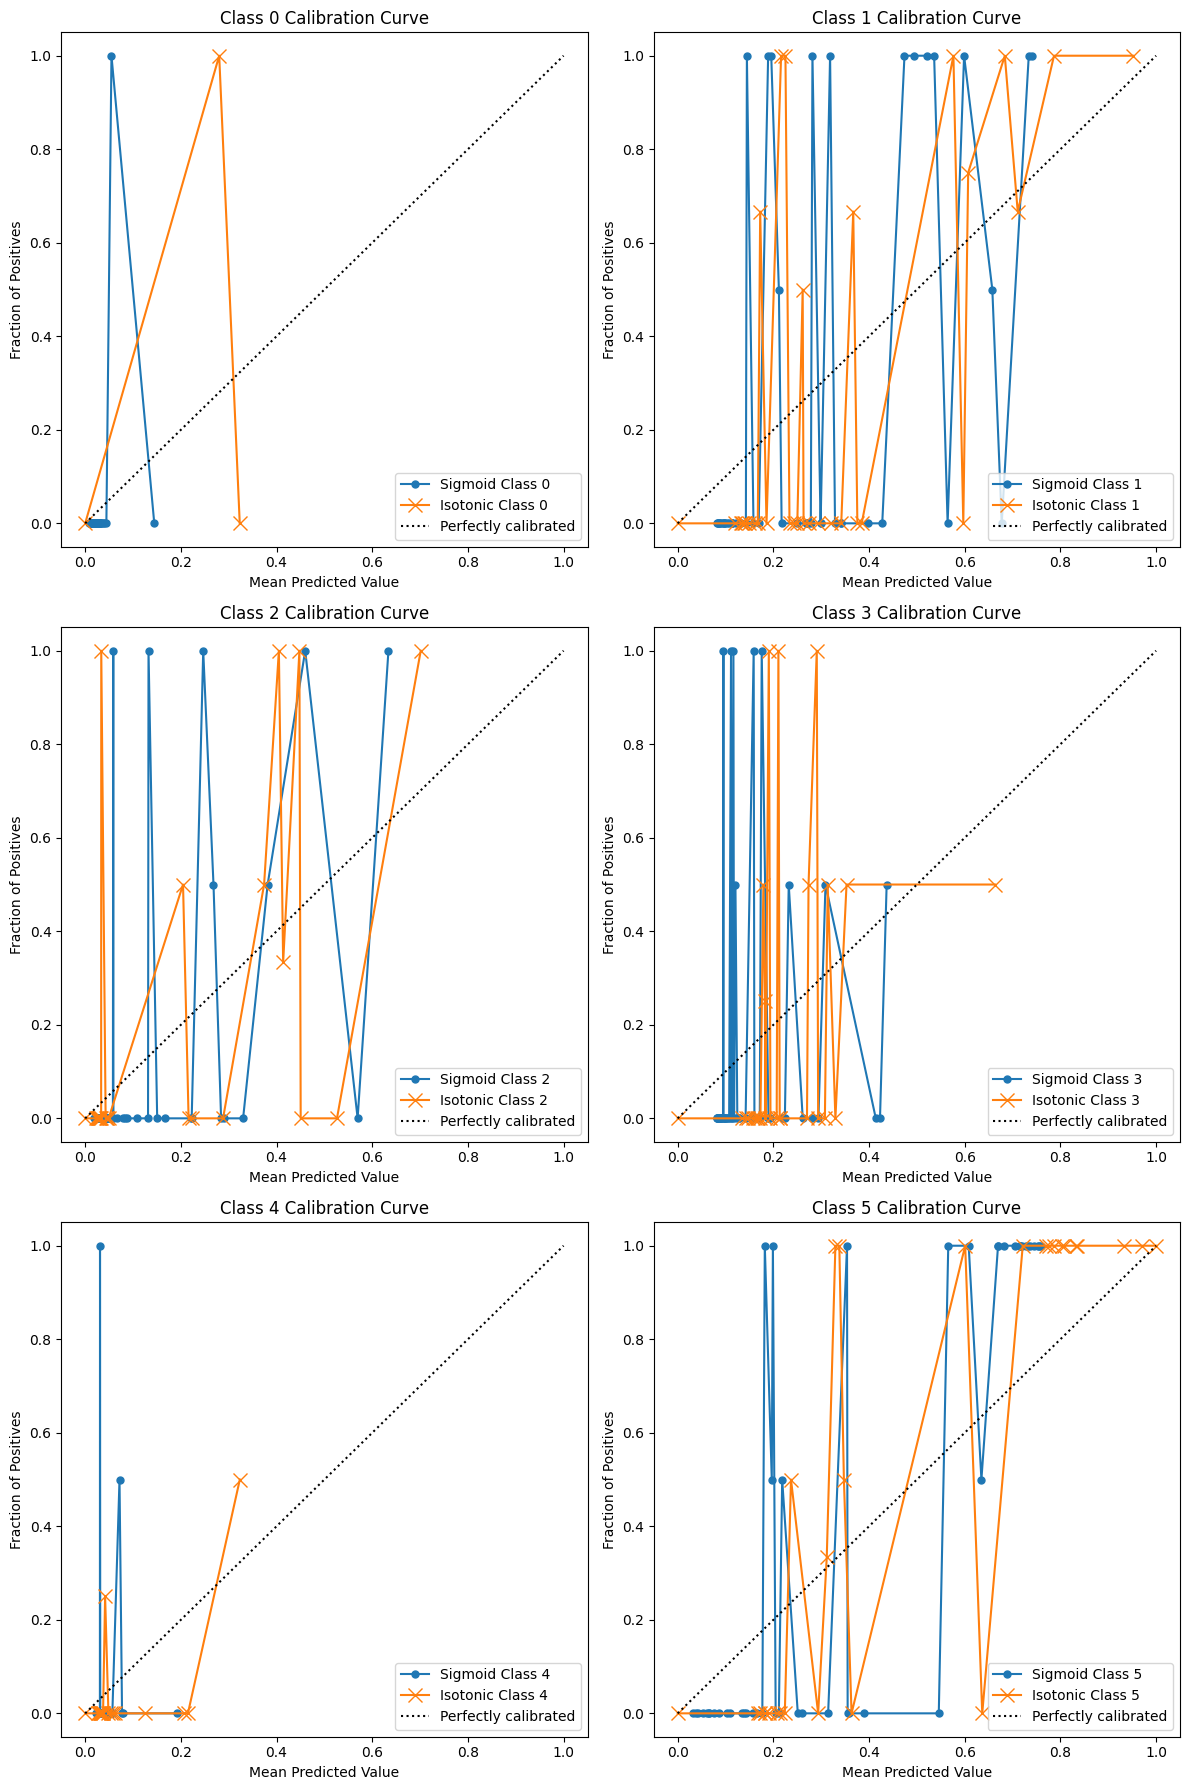

In [ ]:
cal_clf_plat_adaBoost,cal_clf_iso_adaBoost=plot_calibration_curves(clf_adaboost, X_val, y_val)


Model accuracy: 0.5125
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 10  2  2  1  2]
 [ 0  2  3  3  0  0]
 [ 0  6  2  3  1  6]
 [ 0  1  1  0  0  1]
 [ 0  3  1  3  0 25]]
precision_score: 0.45890167661267406
recall_score: 0.3185253267973856
f1_score: 0.30175282234105766
Macro-average ROC AUC: 0.8229660237265195


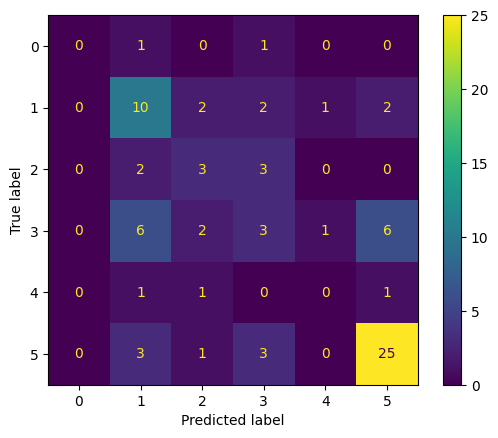

In [ ]:
evaluate_model_performance(clf_adaboost, X_test, y_test)


Model accuracy: 0.6
Confusion matrix:
 [[ 0  1  0  0  0  1]
 [ 0 13  2  0  1  1]
 [ 0  3  5  0  0  0]
 [ 0  8  2  2  0  6]
 [ 0  1  1  0  0  1]
 [ 0  3  1  0  0 28]]
precision_score: 0.6099296788951962
recall_score: 0.3959694989106754
f1_score: 0.3505212306127638
Macro-average ROC AUC: 0.7906098650398637


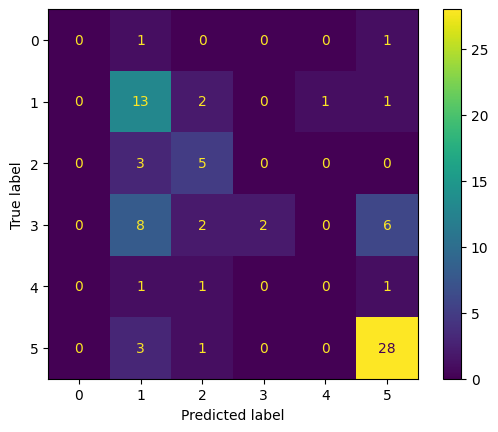

In [ ]:
evaluate_model_performance(cal_clf_plat_adaBoost, X_test, y_test)


Model accuracy: 0.5875
Confusion matrix:
 [[ 0  2  0  0  0  0]
 [ 0 12  3  1  0  1]
 [ 0  3  5  0  0  0]
 [ 0  8  3  4  0  3]
 [ 0  1  1  0  0  1]
 [ 1  4  1  0  0 26]]
precision_score: 0.5705541770057899
recall_score: 0.39426742919389984
f1_score: 0.36000861440269394
Macro-average ROC AUC: 0.8055092799009204


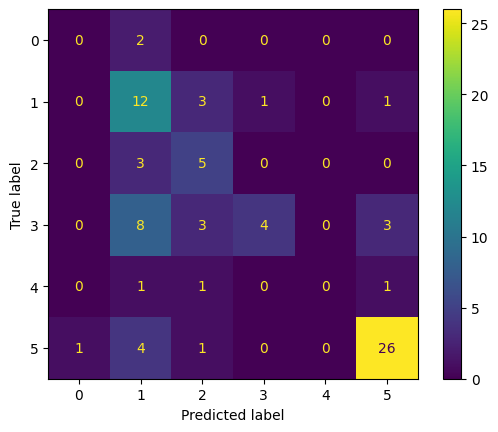

In [ ]:
evaluate_model_performance(cal_clf_iso_adaBoost, X_test, y_test)


## RandomForestClassifier

### Fine tuning part

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [10, 20, 30,None],          
    'min_samples_split': [2, 5],    
    'min_samples_leaf': [1, 2],      
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                     
    scoring='accuracy',       
    n_jobs=-1,                
    verbose=2
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_rf = grid_search.best_estimator_
val_preds = best_rf.predict(X_val)

print(f'Model accuracy on validation data: {accuracy_score(y_val, val_preds)}')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.95
Model accuracy on validation data: 0.609375


### Calibration process

In [ ]:
clf_rf= RandomForestClassifier(
    n_estimators=100,          
    max_depth=20,              
    min_samples_split=2,
    min_samples_leaf=1
).fit(X_train_resampled, y_train_resampled)

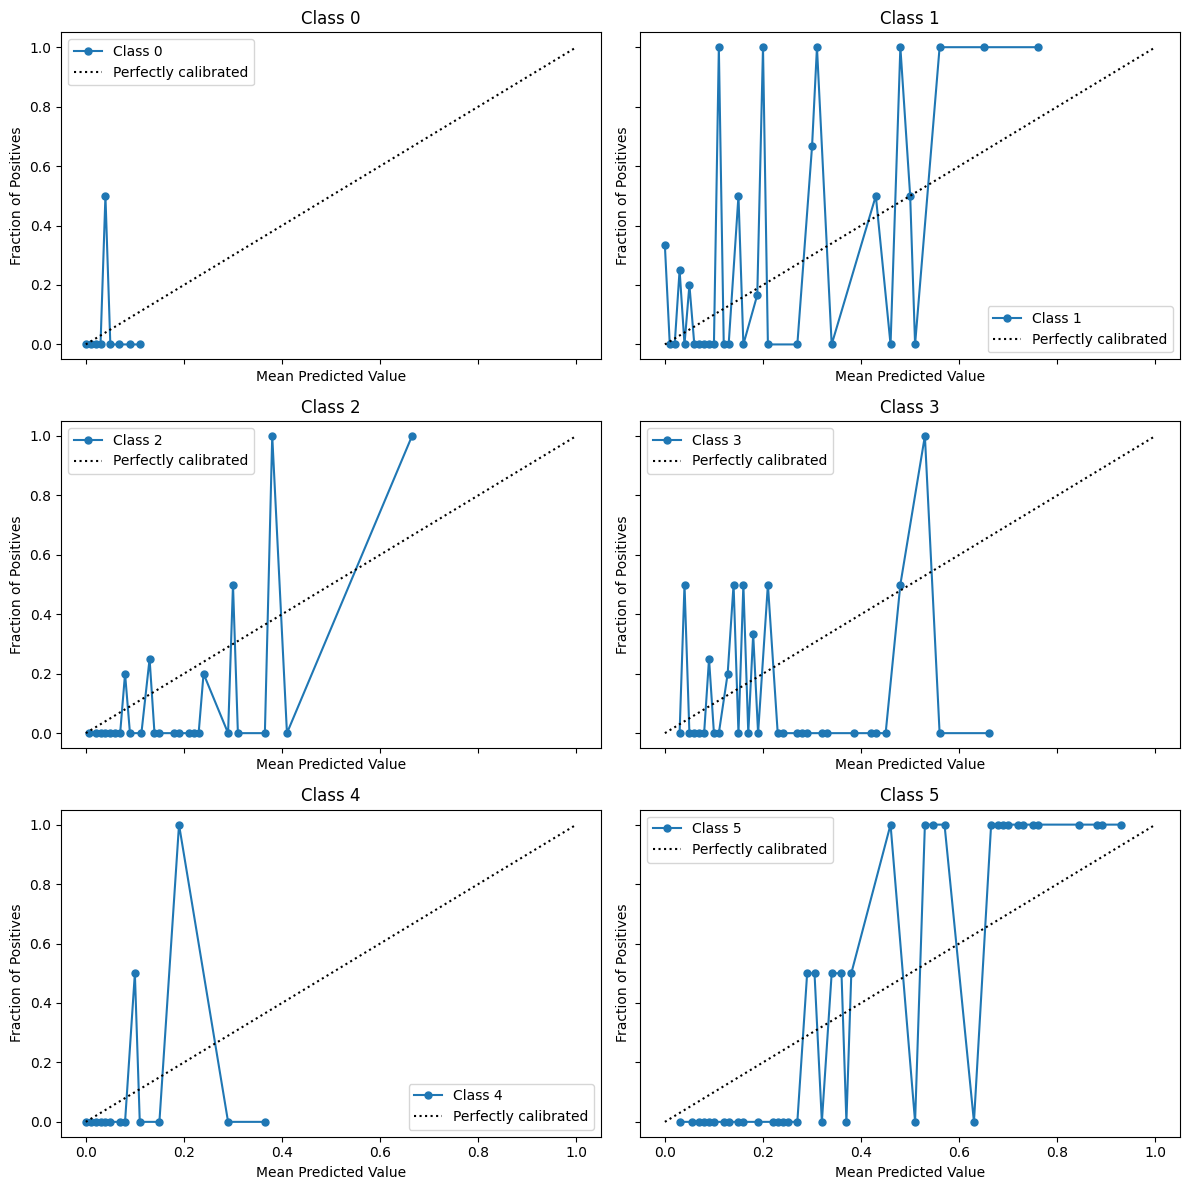

In [ ]:
plot_class_calibration(clf_rf, X_val, y_val)

Brier Scores per Class (Calibration Errors):
Class 0:
  Brier Score (Sigmoid): 0.0148
  Brier Score (Isotonic): 0.0124
Class 1:
  Brier Score (Sigmoid): 0.1433
  Brier Score (Isotonic): 0.1337
Class 2:
  Brier Score (Sigmoid): 0.0790
  Brier Score (Isotonic): 0.0670
Class 3:
  Brier Score (Sigmoid): 0.1193
  Brier Score (Isotonic): 0.1173
Class 4:
  Brier Score (Sigmoid): 0.0308
  Brier Score (Isotonic): 0.0267
Class 5:
  Brier Score (Sigmoid): 0.0966
  Brier Score (Isotonic): 0.0771


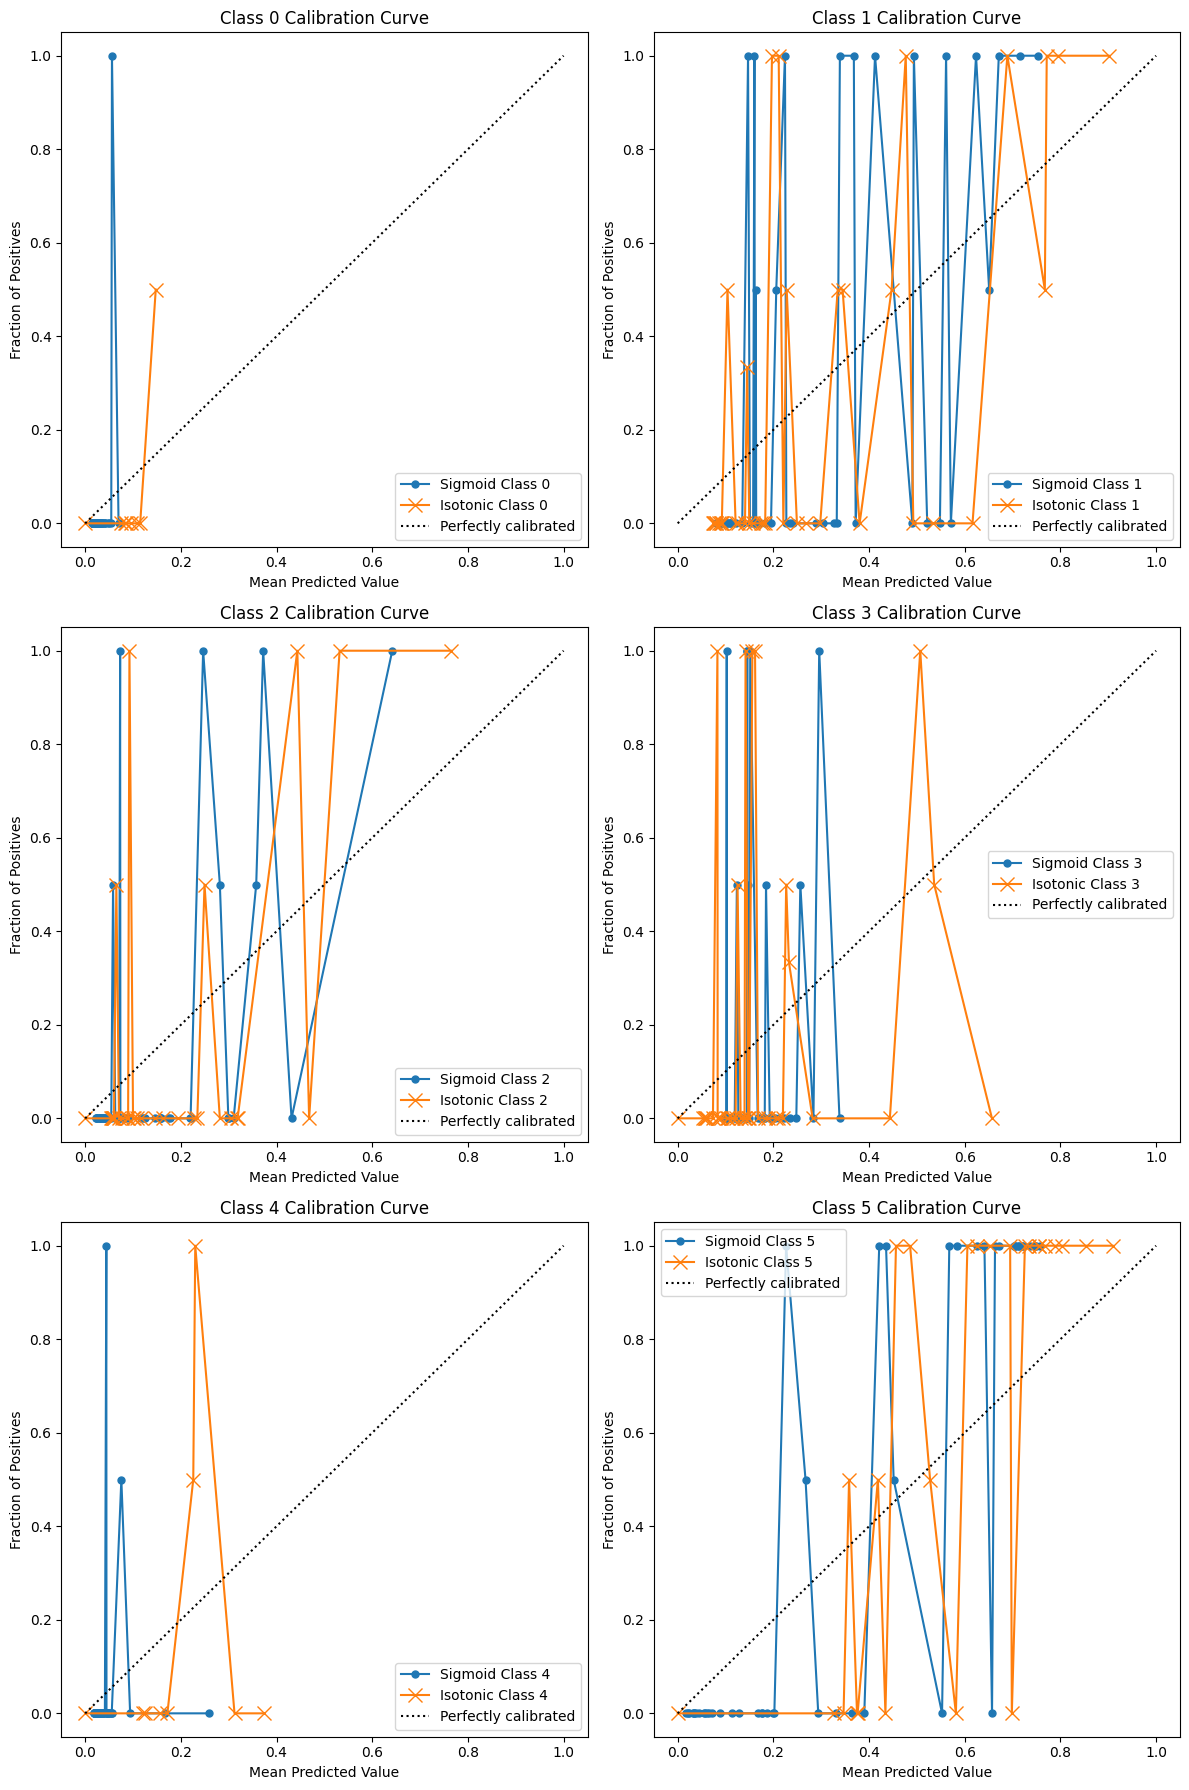

In [ ]:
cal_clf_plat_rf,cal_clf_iso_rf=plot_calibration_curves(clf_rf, X_val, y_val)


Model accuracy: 0.5125
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 11  2  1  1  2]
 [ 0  2  3  1  0  2]
 [ 0  4  2  5  1  6]
 [ 0  1  2  0  0  0]
 [ 0  3  2  5  0 22]]
precision_score: 0.47414044289044294
recall_score: 0.33122276688453156
f1_score: 0.3149954471580108
Macro-average ROC AUC: 0.8468236669601262


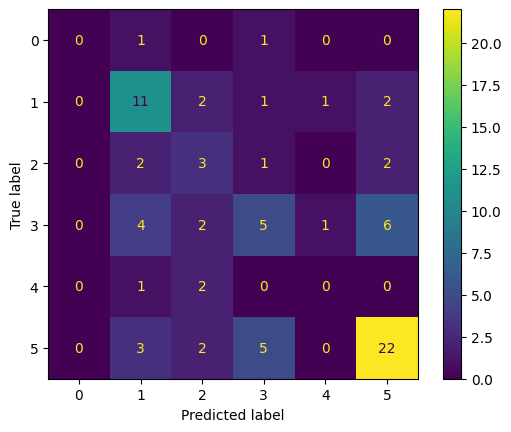

In [ ]:
evaluate_model_performance(clf_rf, X_test, y_test)

Model accuracy: 0.525
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 13  1  0  1  2]
 [ 0  2  3  1  0  2]
 [ 0  7  2  1  1  7]
 [ 0  1  2  0  0  0]
 [ 0  4  3  0  0 25]]
precision_score: 0.46079846079846076
recall_score: 0.32941857298474947
f1_score: 0.2873499107245237
Macro-average ROC AUC: 0.8539613845720789


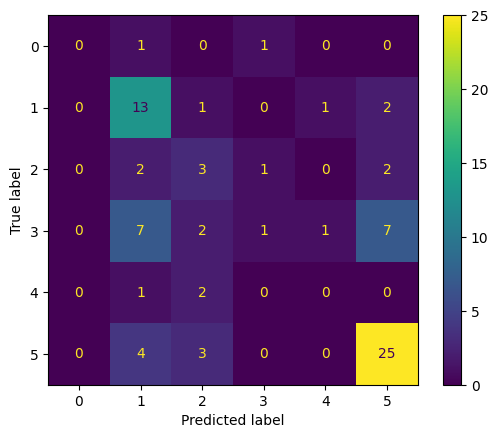

In [ ]:
evaluate_model_performance(cal_clf_plat_rf, X_test, y_test)

Model accuracy: 0.5375
Confusion matrix:
 [[ 0  1  0  1  0  0]
 [ 0 13  1  0  1  2]
 [ 0  2  3  1  0  2]
 [ 0  8  2  1  1  6]
 [ 0  1  2  0  0  0]
 [ 0  4  1  1  0 26]]
precision_score: 0.4589719029374202
recall_score: 0.33462690631808273
f1_score: 0.2956289235061613
Macro-average ROC AUC: 0.8028418248357911


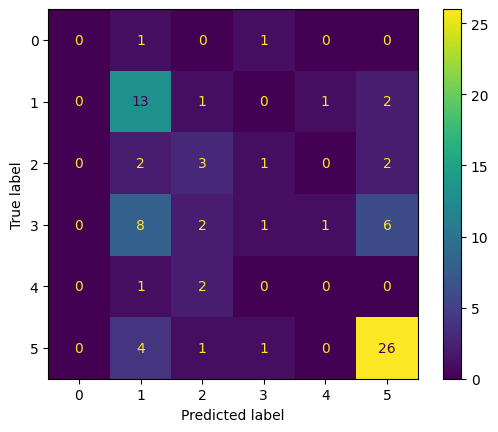

In [ ]:
evaluate_model_performance(cal_clf_iso_rf, X_test, y_test)

# Result and conclusion :

| Classifier          | Model Accuracy | Precision Score  | Recall Score   | F1 Score        | Macro-average ROC AUC |
|---------------------|-----------------|------------------|----------------|------------------|-----------------------|
| **clf_log**          | 0.5125          | 0.4264           | 0.3956         | 0.4026           | 0.7942                |
| **clf_dt**           | 0.4375          | 0.3012           | 0.2722         | 0.2785           | 0.6625                |
| **clf_mlp**          | 0.6000          | 0.5489           | 0.4504         | 0.4683           | 0.8221                |
| **clf_gradientBoosting** | 0.5625      | 0.4784           | 0.4151         | 0.4288           | 0.8161                |
| **clf_gradientBoosting (2nd)** | 0.5375 | 0.4719         | 0.4065         | 0.4200           | 0.7640                |
| **clf_lightgbm**     | 0.6000          | 0.5110           | 0.3653         | 0.3473           | 0.8229                |
| **clf_adaboost**     | 0.5125          | 0.4589           | 0.3185         | 0.3018           | 0.8230                |
| **clf_rf**           | 0.5125          | 0.4741           | 0.3312         | 0.3150           | 0.8468                |


| Classifier                          | Model Accuracy | Precision Score | Recall Score | F1 Score | Macro-average ROC AUC | Average Calibration Error (Brier Score) |
|-------------------------------------|----------------|-----------------|--------------|----------|-----------------------|-----------------------------------------|
| **cal_clf_plat_log**                | 0.4875         | 0.8306          | 0.2491       | 0.1952   | 0.7626                | 0.1141                                  |
| **cal_clf_iso_log**                 | 0.5500         | 0.5998          | 0.3259       | 0.2958   | 0.7857                | 0.1158                                  |
| **cal_clf_plat_dt**                 | 0.4750         | 0.6591          | 0.2439       | 0.1915   | 0.6536                | 0.1349                                  |
| **cal_clf_iso_dt**                  | 0.4750         | 0.4955          | 0.2439       | 0.1940   | 0.6555                | 0.1267                                  |
| **cal_clf_plat_mp**                 | 0.5375         | 0.7858          | 0.3398       | 0.2899   | 0.8031                | 0.1144                                  |
| **cal_clf_iso_mp**                  | 0.6250         | 0.7454          | 0.4404       | 0.4448   | 0.7946                | 0.1142                                  |
| **cal_clf_plat_gradientBoosting**   | 0.5250         | 0.4006          | 0.3097       | 0.2610   | 0.7755                | 0.1217                                  |
| **cal_clf_iso_gradientBoosting**    | 0.5500         | 0.4302          | 0.3404       | 0.2914   | 0.8374                | 0.0884                                  |
| **cal_clf_plat_gradientBoosting (2nd)** | 0.5375      | 0.4780          | 0.3282       | 0.2901   | 0.8090                | 0.1128                                  |
| **cal_clf_iso_gradientBoosting (2nd)** | 0.5625      | 0.4854          | 0.3491       | 0.3148   | 0.7651                | 0.0713                                  |
| **cal_clf_plat_lightgbm**           | 0.5875         | 0.6558          | 0.3566       | 0.3293   | 0.7714                | 0.1143                                  |
| **cal_clf_iso_lightgbm**            | 0.5750         | 0.5274          | 0.3554       | 0.3355   | 0.7149                | 0.0706                                  |
| **cal_clf_plat_adaBoost**           | 0.6000         | 0.6099          | 0.3960       | 0.3505   | 0.7906                | 0.1126                                  |
| **cal_clf_iso_adaBoost**            | 0.5875         | 0.5706          | 0.3943       | 0.3600   | 0.8055                | 0.1178                                  |
| **cal_clf_plat_rf**                 | 0.5250         | 0.4608          | 0.3294       | 0.2873   | 0.8540                | 0.0989                                  |
| **cal_clf_iso_rf**                  | 0.5375         | 0.4590          | 0.3346       | 0.2956   | 0.8028                | 0.0890                                  |


I will sellect cal_clf_iso_lightgbm as it has the lowest calibration error and its accuary(0.575) is comparable to the heighest accuary model (0.6)(cal_clf_plat_adaBoost)

In [ ]:
# Load the model from the pickle file
model_path = 'final_model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(cal_clf_iso_lightgbm, file)